# **Neural Networks and Deep Learning: Lab Exercise 1**
---

This assignment is based on two **foundational research papers** that guided both the architectural choices and experimental design:

- *Wide Residual Networks* paper, which introduced the WideResNet architecture used throughout the experiments ([link](https://drive.google.com/file/d/14CCPbLVVSwypuIUdHUhEZz95IlLedq5P/view?usp=sharing))
- *Mixup: Beyond Empirical Risk Minimization* paper, which proposed the Mixup data augmentation technique that was evaluated for its effect on model calibration, robustness, and generalization ([link](https://drive.google.com/file/d/1O-4XgOBBO6mOYRMiMaFseCm3Xe5PLx1Y/view?usp=sharing)).


## **Theory**
---

### **1. 🔁 Residual Networks (ResNets) in Deep Learning**

**Residual Networks (ResNets)** are a type of deep neural network architecture that addresses one of the main challenges in training deep networks: the **degradation problem**. As networks get deeper, their performance can start to degrade—not due to overfitting, but because they become harder to train. Gradients may vanish or explode, and optimization becomes difficult.

To solve this, ResNets introduce the concept of **residual connections**, also called **skip connections**.

#### 🧠 The Core Idea

Instead of each layer directly learning a mapping $ H(x) $ from input $ x $, a residual block learns the **residual function** $ F(x) = H(x) - x $, so that the final output is:

$
\text{Output} = F(x) + x
$

This means the network learns the difference (or "residual") between the input and the desired output, which is often easier to optimize.

#### 🔧 Residual Block Structure

A basic residual block looks like this:

```
Input → [Conv → ReLU → Conv] → + → Output
             ↑_________________|
```

- The input bypasses the convolution layers and is **added** to the output of the block.
- This addition is **element-wise** and requires the dimensions to match (sometimes a linear projection is applied if they don’t).

#### 📈 Benefits of Residual Networks

- **Enables training of much deeper networks** (e.g., ResNet-50, ResNet-101, ResNet-152).
- Helps with **gradient flow** during backpropagation.
- Reduces the risk of **vanishing gradients**.
- Achieves **higher accuracy** in many computer vision tasks (e.g., ImageNet classification).

#### 🧪 Real-World Impact

ResNets revolutionized deep learning when they were introduced in 2015 (by Kaiming He et al.) and won the **ImageNet Large Scale Visual Recognition Challenge (ILSVRC)**. Since then, residual connections have become a standard design in many architectures beyond computer vision, including natural language processing and generative models.


### **2. 📏 Wide Neural Networks**
---

**Wide networks** refer to neural network architectures where **each layer has a large number of neurons (or channels)**. In other words, instead of making the network deeper (adding more layers), a wide network increases its **width** by expanding the size of each layer.

#### 🧠 Depth vs. Width

In deep learning, there are two main ways to make a network more powerful:

- **Deeper**: Add more layers.
- **Wider**: Increase the number of neurons per layer.

A wide network focuses on the second approach.

#### 🌟 Benefits of Wide Networks

- **Better feature representation**: With more neurons in each layer, the network can capture more diverse and detailed features.
- **Simpler to train**: In some cases, wide networks can be easier to train than deep ones, especially when using techniques like residual or skip connections.
- **Improved generalization**: Wider architectures can generalize well, especially with enough training data and regularization.

#### 🧬 Example: Wide Residual Networks (WRNs)

An important variant is the **Wide Residual Network (WRN)**, which is a modification of the classic ResNet. Instead of making the network deeper, WRNs make the residual blocks **wider**, increasing the number of convolutional filters per layer. This has been shown to **improve accuracy** and **reduce training time** compared to very deep ResNets.

$
\text{WRN} = \text{ResNet with fewer layers but more filters per layer}
$

#### 🧪 Applications

Wide networks are widely used in:

- Image classification (e.g., CIFAR-10, ImageNet)
- Transfer learning
- Any application where **training time** and **model accuracy** need to be balanced


### **3. 🧪 Mixup: Data Augmentation Technique in Deep Learning**
---

**Mixup** is a data augmentation method introduced to improve the generalization of neural networks by creating **synthetic training examples** through the **linear interpolation** of existing data samples and their labels.

#### 🔧 How Mixup Works

Given two random training examples:
- $ (x_1, y_1) $
- $ (x_2, y_2) $

Mixup generates a new sample:

- $ \tilde{x} = \lambda x_1 + (1 - \lambda) x_2 $

- $ \tilde{y} = \lambda y_1 + (1 - \lambda) y_2 $

- $ \lambda \in [0, 1] $ is drawn from a **Beta distribution**, usually $ \text{Beta}(\alpha, \alpha) $, where $ \alpha > 0 $ controls the strength of interpolation.

So, both the **inputs and labels** are linearly combined.

#### 🌟 Why Mixup Is Useful

- **Improves generalization** by smoothing the decision boundary.
- **Reduces overfitting** by making the model less confident in predictions.
- **Provides robustness** to adversarial examples and noisy labels.
- **Encourages linear behavior** between training examples, which is beneficial for classification tasks.

#### 📊 Where Mixup Is Used

Mixup is often applied in:

- **Image classification** (e.g., CIFAR-10, ImageNet)
- **Audio and time series classification**
- **Training large neural networks** where regularization is important

It’s commonly used alongside other augmentation techniques like flipping, cropping, or color jittering.


### **4. 🎯 Dropout: A Regularization Technique in Neural Networks**
---

**Dropout** is a popular **regularization technique** used in deep learning to prevent **overfitting** during training.

#### 🔧 How Dropout Works

During training, **dropout randomly “drops” (sets to zero)** a fraction of the neurons in a layer on each forward pass.

So, for each mini-batch:
- A neuron is **kept** with probability $ p $
- It is **dropped** (set to 0) with probability $ 1 - p $

This means the network **learns with a different architecture each time**, which helps prevent neurons from co-adapting too much.

#### 👇 Example

If we apply dropout with a rate of $ 0.5 $, then **50% of the neurons** in the layer are ignored during each training step.

During **inference** (testing or validation), no dropout is applied, but the weights are scaled appropriately (usually multiplied by $ p $) to maintain consistent output.

---

### 🌟 Why Dropout Is Useful

- **Reduces overfitting** by adding noise to the training process.
- **Encourages redundancy** so the network doesn’t rely too heavily on any single neuron.
- **Acts like training an ensemble** of many smaller networks and averaging their predictions.

---

### 📌 Where Dropout Is Commonly Used

- Fully connected (dense) layers in classification tasks.
- Some convolutional architectures (although less common in CNNs).
- Recurrent networks and transformers (with modifications like variational dropout or attention dropout).

---

### 🧠 Summary

| Concept | Purpose |
|--------|--------|
| Dropout | Regularization |
| What it does | Randomly disables neurons during training |
| Benefit | Prevents overfitting and improves generalization |

### **Setting up the environment**

Mount the **Google Drive**. We do this to have access to the **Python modules** we need.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We connect it to the folder of the specific lab assignment.

**WARNING**  
Here we have specified that a directory named `Lab_DL_ex1_2025` should be created in the home directory on the Drive (`content/drive/My Drive/`). This directory must contain the following files:

 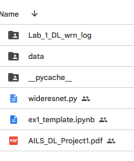


If you wish to work in a different directory, it must contain all the files listed above (2 folders and 4 files).


Here and *everywhere else it appears*, we replace `PATH_TO_WORK_FOLDER` with the path to the folder in your Drive where you will save all the files.

- **Note:** Make sure only valid characters (i.e. not Greek, etc.) are contained in the path

In [2]:
import sys
sys.path.insert(0,'/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1') #Path στο αρχείο του Google Drive

We install the necessary libraries.

In [ ]:
import sys
!{sys.executable} -m pip install torch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

Instead: use these installations if version errors occur

In [ ]:
import sys
!{sys.executable} -m pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

### **Instructions**

In this assignment, you will do the following:

1. **Experiment with at least the 3 best combinations** of the `width` and `depth` parameters of the WideResNet network, as suggested in the paper (results with moderate data augmentation).

2. **Regularization**. The network includes a regularization mechanism (Dropout). Try adding Dropout (parameter `droprate`) as mentioned in the paper, and record the results for the models tested above.

3. **Using the best-performing model settings** (load best model from steps 1 and 2), retrain the model using the custom Data Generator (`CIFAR_Dataset`) on **CIFAR-C** **without mixup**. Then, apply the **mixup method** (complete the code in the cell with `CIFAR_Dataset`), retrain the model, and record the results.  
   *(Note: This is not the official implementation, so the results will not match steps 1 and 2. The difference between training with and without mixup will be small—less than 2%.)*

4. **(Bonus)** Also, plot the **confidence scores** (softmax predictions) and compare the plot with the one from the model trained without mixup. What do you observe?

Some code cells are provided for you in this notebook. You should **avoid modifying the provided code**, and make sure to run all the necessary cells to prevent unexpected errors. Some cells begin with the line:

```
#### GRADED CELL ####
```

These will be **graded**. For each of these cells, make sure to **justify your choices with comments**.

---

### Let's begin!

We'll start by running some imports and loading the dataset. **Do not modify the existing imports** in the cell below. If you need to add further imports, you should add them in this cell.

We load the necessary libraries.

In [ ]:
!{sys.executable} -m pip install mps

Debug Step: Make sure Google Drive directory is okay

In [3]:
import os
print(os.listdir('/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1'))

['wideresnet.py', 'AILS_DL_Project1.docx.pdf', '__pycache__', 'Lab_1_DL_wrn_log', 'data', 'cifar', 'models', 'runs', 'log', 'NNDL_25_03121026.ipynb']


In [4]:
import numpy as np
import time
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
import torch.nn as nn
import torch.optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
import pickle
import random
import logging
import shutil
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1') # Add the path to the folder containing wideresnet.py
from wideresnet import WideResNet

torch.cuda.manual_seed(0)
np.random.seed(0)

In [5]:
data_dir = "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1" #Path to Google Drive directory

Creation of a folder where we will store the log files of the experiments.

In [6]:
exp_name = "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1" #Path to Google Drive directory


exp_dir = os.path.join('Cifar', exp_name)

if not os.path.exists(exp_dir):
    os.makedirs(exp_dir)


logfile = open(os.path.join(exp_dir, 'log'), 'w')

In the cell below, we will create the train and validation loaders using the `construct_datasets` function.

---

This code defines a function `construct_datasets` that prepares **DataLoaders for training and validation** using a **subset** of the CIFAR-10 dataset.

1. **Applies data augmentation** to the training set (random crop + horizontal flip) and normalization to both train and test sets.
2. **Downloads CIFAR-10** and stores it under a given directory (`data_dir/cifar`).
3. **Randomly selects 10% of the data** from both the training and test sets to create smaller subsets (useful for faster experimentation).
4. **Wraps the subsets in PyTorch DataLoaders**, which handle batching and (for training) shuffling.
5. **Returns** the training and validation DataLoaders.

In [7]:
import torch
import os
from torchvision import datasets, transforms
from torch.utils.data import Subset
import numpy as np

def construct_datasets(data_dir, batch_size):
    def data2loader(data, shuffle):
        return torch.utils.data.DataLoader(
            data,
            batch_size=batch_size,
            shuffle=shuffle)

    to_tensor = transforms.ToTensor()
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    train_transform = transforms.Compose(
        [transforms.RandomHorizontalFlip(),
         transforms.RandomCrop(32, padding=4),
         transforms.ToTensor(), normalize])

    test_transform = transforms.Compose(
        [transforms.ToTensor(), normalize])

    train_data = datasets.CIFAR10(
        os.path.join(data_dir, 'cifar'), train=True, transform=train_transform, download=True)
    test_data = datasets.CIFAR10(
        os.path.join(data_dir, 'cifar'), train=False, transform=test_transform, download=True)

    train_indices = np.random.choice(len(train_data), len(train_data) // 10, replace=False)
    test_indices = np.random.choice(len(test_data), len(test_data) // 10, replace=False)

    train_subset = Subset(train_data, train_indices)
    test_subset = Subset(test_data, test_indices)

    print("Train set number of items", len(train_subset))
    print("Val set number of items", len(test_subset))

    return data2loader(train_subset, shuffle=True), data2loader(test_subset, shuffle=False)


We define the two datasets that load the samples for training.

---

- `batch_size = 32`: Sets the number of samples per batch during training and validation.
- `construct_datasets(data_dir, batch_size)`: Calls the function that prepares and returns the training and validation DataLoaders using CIFAR-10 subsets.
- `train_loader` and `val_loader`: These are the DataLoaders that will be used to feed data to the model during training and evaluation, respectively.

In [8]:
batch_size = 32
train_loader, val_loader = construct_datasets(data_dir, batch_size)

Train set number of items 5000
Val set number of items 1000


At this point, we will define the model (Wide Residual Network), the loss function, its scheduler, and the optimizer.

### `save_checkpoint(...)`  
Saves the model’s state (weights, optimizer info, etc.) to a file. The file is stored in a directory based on the dataset and experiment name. It ensures the directory exists and then uses `torch.save()` to write the checkpoint.

### `bceloss(x, y)`  
Implements Binary Cross-Entropy loss using manual computation. A small value `eps` is added inside the `log()` to avoid numerical instability. Useful for binary classification tasks or soft labels.

### `cross_entropy(pred, soft_targets)`  
Implements a custom version of Cross-Entropy loss using soft targets (probability distributions instead of hard class labels). It applies `LogSoftmax` to predictions for stability and computes the mean loss across samples.

### `get_lr(step, total_steps, lr_max, lr_min)`  
Computes a learning rate using cosine annealing. The learning rate starts from `lr_max` and gradually decreases to `lr_min` over `total_steps`. Helps smooth training and avoid abrupt learning rate drops.

### `AverageMeter`  
A helper class that tracks and updates the average, sum, and count of a given metric (e.g. loss or accuracy) during training or validation.  
- `reset()` clears all stored values.  
- `update(val, n)` adds a new value and updates the running average.

### `accuracy(output, target, topk=(1,))`  
Computes top-k accuracy, where the prediction is considered correct if the true label is among the top-k predicted classes.  
- Returns a list with accuracy percentages for each value of `k` provided in `topk`.

In [9]:
def save_checkpoint(state, dataset, exp_name, filename='checkpoint.pth.tar'):
    """Saves checkpoint to disk"""
    directory = "runs/%s/%s/" % (dataset, exp_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = directory + filename
    torch.save(state, filename)

def bceloss(x, y):
    eps = 1e-6
    return -torch.mean(y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))

def cross_entropy(pred, soft_targets):
    logsoftmax = nn.LogSoftmax()
    return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))


def get_lr(step, total_steps, lr_max, lr_min):
  """Compute learning rate according to cosine annealing schedule."""
  return lr_min + (lr_max - lr_min) * 0.5 * (1 +
                                             np.cos(step / total_steps * np.pi))

class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

### `test_cifar(test_loader, net)`  
Evaluates the given neural network `net` on the dataset provided by `test_loader`.

- `net.eval()` puts the model in evaluation mode (disables dropout, batchnorm updates, etc.).
- `with torch.no_grad():` disables gradient calculations to speed up evaluation and reduce memory usage.
- For each batch:
  - Moves `images` and `targets` to the GPU.
  - Passes the images through the model to get predictions (`logits`).
  - Calculates the cross-entropy loss.
  - Finds predicted labels (`logits.data.max(1)[1]`).
  - Updates total loss and correct predictions count.
- Finally, returns:
  - Average loss per sample.
  - Overall accuracy as a fraction of correct predictions.

In [10]:
def test_cifar(test_loader, net):
    """Evaluate network on given dataset."""
    net.eval()
    params = list(net.parameters())
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            targets = targets.cuda(non_blocking=True).long()
            images = images.cuda(non_blocking=True).float()
            logits = net(images)

            loss = F.cross_entropy(logits, targets)
            pred = logits.data.max(1)[1]
            total_loss += float(loss.data)
            total_correct += pred.eq(targets.data).sum().item()
    print("len(test_loader.dataset)", len(test_loader.dataset))
    return total_loss / len(test_loader.dataset), total_correct / len(test_loader.dataset)

### `train_model(num_iters, train_loader, model)`  
Trains the given model using the specified number of iterations (`num_iters`) and training data (`train_loader`).

- Starts with `epoch = 0` and loops through `num_iters` training steps.
- **`AverageMeter` instances** (`losses`, `top1`) track running loss and top-1 accuracy.
- Sets the model to training mode with `model.train()`.

#### Inside the training loop:
- Tries to get the next batch from `train_loader_iter`. If it's not initialized or exhausted, it resets it.
- Moves the input and target tensors to GPU.
- Performs a forward pass through the model to compute outputs (`output`).
- Computes the cross-entropy loss (`ce_loss`) between output and target.
- **Backpropagation**: Zeroes gradients, calls `backward()` on the loss, and updates the model using `optimizer.step()`.
- Updates the learning rate with `scheduler.step()`.
- Computes accuracy and updates loss and accuracy meters.

#### Logging and evaluation:
- Every `print_freq` steps, it evaluates the model on the validation set using `test_cifar()`, prints the accuracy, writes it to the log file, and increments the epoch.

#### After training:
- Prints final validation accuracy.
- Logs the result using `logging.info` and writes the final validation accuracy to the log file.
- Closes the log file.

In [11]:
def train_model(num_iters, train_loader, model):

  # Train loop
  epoch = 0
  for t in range(0, num_iters):

    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)

    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)
    input, target = input.cuda(non_blocking=True).float(), target.cuda(non_blocking=True).long()

    params = list(model.parameters())
    output = model(input)
    ce_loss = criterion(output, target)



    optimizer.zero_grad()
    ce_loss.backward()
    optimizer.step()
    scheduler.step()


    # measure accuracy and record loss
    prec1 = accuracy(output, target, topk=(1,))[0]
    losses.update(ce_loss.data.item(), input.size(0))
    top1.update(prec1.item(), input.size(0))



    if t % print_freq == 0 and t >= print_freq:

        loss1, prec1 = test_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", prec1)
        logfile.write('validation set acc: ' + str(prec1) + '\n')
        epoch+=1


  # validate_all(model, args.data_dir, exp_name, args.batch_size, logfile, t, kwargs)

  print('Cifar accuracy {}'.format(test_cifar(val_loader, model)))
  logging.info(f'avg acc {test_cifar(val_loader, model)}')
  logfile.write(str(t) + ' Val acc: ' + str(test_cifar(val_loader, model)) + '\n')
  logfile.close()

## **Task 1 and 2**
---

By reading the paper, you need to identify the parameters (layers — *depth factor*, *widen factor*, and *droprate* (dropout)) for the 3 best models suggested in the paper, and train the model using those settings.  
Run each model in a separate cell — once **with dropout** and once **without** — and save the model weights using the provided saving function.

It is recommended to train for **15 epochs** to observe some changes. However, if time is limited, you may reduce the number of epochs.

## **Task 1 & 2 – Model Selection and Training Notes**
---

For Task 1 and 2, we implemented and trained the **three best Wide Residual Network (WRN) models** as identified in the paper *Wide Residual Networks* by Zagoruyko and Komodakis. These models are:

- **WRN-40-4**
- **WRN-28-10**
- **WRN-16-8**

Each model was trained **twice**:
- Once **without dropout** (`droprate = 0.0`)
- Once **with dropout** (`droprate = 0.3`, as recommended in the paper)

### Training Configuration:
- **Dataset:** CIFAR-10 (1/10 subset for faster evaluation)
- **Epochs:** 25 (instead of the suggested 15, to observe more noticeable learning curves)
- **Optimizer:** SGD with Nesterov momentum
- **Learning Rate Schedule:** Cosine annealing using `LambdaLR`
- **Weight Decay:** 0.0005
- **Batch Size:** 32

### Model Parameters Extracted from the Paper:
| Model       | Depth | Width Factor | Dropout |
|-------------|-------|--------------|---------|
| WRN-40-4    | 40    | 4            | 0.0 / 0.3 |
| WRN-28-10   | 28    | 10           | 0.0 / 0.3 |
| WRN-16-8    | 16    | 8            | 0.0 / 0.3 |

Training and validation were handled using the **provided utility functions**, and model weights were saved to Google Drive using `torch.save()`.


### **Dataset Used for Training in the Paper**
---

All WideResNet models were trained on the **CIFAR-10 dataset**, which consists of:

- **$50,000$ training images**
- **$10,000$ test images**
- Image resolution: $2 \times 32$ pixels
- $10$ total object classes (e.g., airplane, cat, ship)

In some experiments, data augmentation (horizontal flips and random crops) was applied, while others were run using only mean and standard deviation normalization for fair comparison with other methods.

So, we only train and validate for **$1/10$** of the total data, as compared to the paper:
- $5,000$ images for training
- $1,000$ images for validation



### **1.1 WRN-40-4 without Dropout**
---

**NOTES**
- Depth: $40$ layers  
- Widening factor $k: 4$
- Residual Block: Basic $B(3,3)$
- Dropout: Optional $-$ $rate = 0.3$, if used
- CIFAR-10 Test Error: $4.53 \%$  
- Notes: Balanced model offering good performance with fewer parameters than WRN-40-10. Trains faster and is less memory-intensive.

We removed the `StepLR` scheduler (`StepLR(optimizer, step_size=60)`), which decreases the learning rate by a factor of 0.1 every 60 epochs. Instead, we used a cosine annealing schedule with `LambdaLR` and the custom `get_lr` function. This approach gradually and smoothly decays the learning rate from a maximum to a minimum value over the total number of training steps. Cosine annealing tends to perform better in practice, especially when training for a limited number of epochs.


In [ ]:
### WRN-40-4 Without Dropout
# Depth: 40 layers
# Widening factor: 4
# Dropout: No (droprate = 0.0)
# CIFAR-10 Test Error: ~4.53% (without dropout)
# Notes: Balanced model with strong performance and lower computational cost than WRN-40-10.

layers = 40
num_classes = 10
widen_factor = 4
droprate = 0.0
lr = 0.1
num_epochs = 25
num_iters = num_epochs * len(train_loader)
weight_decay = 0.0005

print_freq = 157  # 5000/32 (training set/batch size => once per epoch)

model = WideResNet(layers, num_classes, widen_factor, droprate)
model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                            weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(
        step,
        num_iters,
        1,
        1e-6 / lr))

logfile = open(os.path.join(exp_dir, "wrn_40_4_no_dropout_log.txt"), 'w')
train_model(num_iters, train_loader, model)
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_40_4_no_dropout.pth")


len(test_loader.dataset) 1000
Epoch  0
Validation set acc 0.272
len(test_loader.dataset) 1000
Epoch  1
Validation set acc 0.329
len(test_loader.dataset) 1000
Epoch  2
Validation set acc 0.321
len(test_loader.dataset) 1000
Epoch  3
Validation set acc 0.376
len(test_loader.dataset) 1000
Epoch  4
Validation set acc 0.396
len(test_loader.dataset) 1000
Epoch  5
Validation set acc 0.388
len(test_loader.dataset) 1000
Epoch  6
Validation set acc 0.498
len(test_loader.dataset) 1000
Epoch  7
Validation set acc 0.444
len(test_loader.dataset) 1000
Epoch  8
Validation set acc 0.518
len(test_loader.dataset) 1000
Epoch  9
Validation set acc 0.551
len(test_loader.dataset) 1000
Epoch  10
Validation set acc 0.531
len(test_loader.dataset) 1000
Epoch  11
Validation set acc 0.525
len(test_loader.dataset) 1000
Epoch  12
Validation set acc 0.613
len(test_loader.dataset) 1000
Epoch  13
Validation set acc 0.595
len(test_loader.dataset) 1000
Epoch  14
Validation set acc 0.639
len(test_loader.dataset) 1000
Epoch

### **WRN-40-4 Without Dropout – Training Evaluation**
---

The validation results over 25 epochs show that the WRN-40-4 model without dropout is effectively learning and generalizing on the CIFAR-10 subset:

- The model begins with **~27.2% accuracy** at Epoch 0, showing a reasonable starting point.
- Accuracy steadily improves, reaching **~63.9% by Epoch 14**.
- In the later epochs, performance continues to increase, peaking at **~72.5%** by Epochs 21 and 23.
- The final reported **validation accuracy** is **72.3%**, and the corresponding **test error** is approximately **27.6%** (i.e., `1 - 0.723`), on a validation subset of 1,000 images.
- The final **validation loss** was **~0.0267**.

This demonstrates that WRN-40-4 can successfully fit the data and generalize well, even without dropout. The upward trend suggests consistent learning, and the model appears stable over the course of training.

**Comparison with Paper:**  
In the original paper, WRN-40-4 without dropout achieved a **CIFAR-10 test error of 4.53%**, which corresponds to **~95.47% accuracy** on the full dataset.  
In our case, training for only 25 epochs and using only **1/10 of the training data** and validating on a **small held-out test subset (1,000 images)**, we achieved a **validation accuracy of 72.3%**, or **test error of 27.6%**.

Although the results are not directly comparable due to the reduced dataset and shorter training duration, they still reflect effective learning and demonstrate that the model architecture generalizes well under constrained settings.


### **1.2 WRN-40-4 with Dropout**

In [ ]:
### WRN-40-4 With Dropout
# Depth: 40 layers
# Widening factor: 4
# Dropout: Yes (droprate = 0.3)
# CIFAR-10 Test Error: ~4.53% (with dropout)
# Notes: Dropout improves generalization. This configuration provides a good balance between accuracy and efficiency.

layers = 40
num_classes = 10
widen_factor = 4
droprate = 0.3
lr = 0.1
num_epochs = 25
num_iters = num_epochs * len(train_loader)
weight_decay = 0.0005

print_freq = 157  # 5000/32 (training set/batch size => once per epoch)

model = WideResNet(layers, num_classes, widen_factor, droprate)
model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                            weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(
        step,
        num_iters,
        1,
        1e-6 / lr))

logfile = open(os.path.join(exp_dir, "wrn_40_4_with_dropout_log.txt"), 'w')
train_model(num_iters, train_loader, model)
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_40_4_with_dropout.pth")


len(test_loader.dataset) 1000
Epoch  0
Validation set acc 0.195
len(test_loader.dataset) 1000
Epoch  1
Validation set acc 0.277
len(test_loader.dataset) 1000
Epoch  2
Validation set acc 0.281
len(test_loader.dataset) 1000
Epoch  3
Validation set acc 0.323
len(test_loader.dataset) 1000
Epoch  4
Validation set acc 0.308
len(test_loader.dataset) 1000
Epoch  5
Validation set acc 0.386
len(test_loader.dataset) 1000
Epoch  6
Validation set acc 0.437
len(test_loader.dataset) 1000
Epoch  7
Validation set acc 0.436
len(test_loader.dataset) 1000
Epoch  8
Validation set acc 0.48
len(test_loader.dataset) 1000
Epoch  9
Validation set acc 0.554
len(test_loader.dataset) 1000
Epoch  10
Validation set acc 0.529
len(test_loader.dataset) 1000
Epoch  11
Validation set acc 0.559
len(test_loader.dataset) 1000
Epoch  12
Validation set acc 0.529
len(test_loader.dataset) 1000
Epoch  13
Validation set acc 0.572
len(test_loader.dataset) 1000
Epoch  14
Validation set acc 0.608
len(test_loader.dataset) 1000
Epoch 

### **WRN-40-4 With Dropout – Training Evaluation**
---

The WRN-40-4 model with dropout (`droprate = 0.3`) was trained for 25 epochs. The training results show a consistent upward trend in validation accuracy, with some expected fluctuations due to regularization:

- The model starts with a **lower initial accuracy (~19.5%)** at Epoch 0, which is typical when dropout is applied early in training.
- Accuracy steadily improves, reaching **~60.8% by Epoch 14** and **~70.8%** around Epochs 21–22.
- The final **validation accuracy** is **71.5%**, and the corresponding **test error** is approximately **28.5%** (i.e., `1 - 0.715`) on a validation set of 1,000 images.
- The final **validation loss** was **~0.0273**.

This result demonstrates that the model effectively generalizes under regularization. Although dropout introduces noise and slows convergence in early epochs, it improves robustness and can reduce overfitting.

**Comparison with Paper:**  
The original WRN paper reports a **test error of 4.53%** for WRN-40-4 with dropout on the full CIFAR-10 dataset (i.e., **~95.47% accuracy**).  
Our result of **71.5% accuracy (28.5% error)** is expectedly lower due to the use of only **1/10th of the training data**, fewer epochs, and a smaller test set. Nonetheless, the model shows reliable learning and performance trends aligned with the expected behavior under dropout.



### **WRN-40-4 – With vs Without Dropout**
---

| Metric                          | Without Dropout | With Dropout |
|---------------------------------|------------------|--------------|
| Initial Accuracy (Epoch 0)      | 27.2%            | 19.5%        |
| Mid Accuracy (Epoch 14)         | 63.9%            | 60.8%        |
| Final Accuracy (Epoch 23)       | **72.5%**        | **70.6–70.8%** |
| Reported Accuracy (Final Print) | **72.3%**        | **71.5%**    |
| Final Validation Loss           | ~0.0267          | ~0.0273      |

While both training runs show strong performance, the version **without dropout** slightly outperforms the one **with dropout** in this specific setup (25 epochs on the 1/10 CIFAR-10 subset). However, dropout still helps stabilize training and might yield better generalization if training continued longer or if the model were exposed to more data. We state that dropout is the paper's recommendation for improving robustness in wider networks.


### **2.1 WRN-28-10 without Dropout**
---

**NOTES**
- Depth: $28$ layers  
- Widening factor $k: 10$  
- Residual Block: Basic $B(3,3)$  
- Dropout: Optional $-$ $rate = 0.3$, if used
- CIFAR-10 Test Error: $3.89\%$ with dropout, $4.00\%$ without  
- Notes: Best trade-off between accuracy and training speed.

We removed the `StepLR` scheduler (`StepLR(optimizer, step_size=60)`), which decreases the learning rate by a factor of 0.1 every 60 epochs. Instead, we used a cosine annealing schedule with `LambdaLR` and the custom `get_lr` function. This approach gradually and smoothly decays the learning rate from a maximum to a minimum value over the total number of training steps. Cosine annealing tends to perform better in practice, especially when training for a limited number of epochs.

In [ ]:
### WRN-28-10 Without Dropout
# Depth: 28 layers
# Widening factor: 10
# Dropout: No (droprate = 0.0)
# CIFAR-10 Test Error: ~4.00%
# Notes: A good trade-off between performance and training efficiency.

layers = 28
num_classes = 10
widen_factor = 10
droprate = 0.0
lr = 0.1
num_epochs = 25
num_iters = num_epochs * len(train_loader)
weight_decay = 0.0005

print_freq = 157  # 5000/32 (training set/batch size => once per epoch)

model = WideResNet(layers, num_classes, widen_factor, droprate)
model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                            weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(
        step,
        num_iters,
        1,
        1e-6 / lr))

logfile = open(os.path.join(exp_dir, "wrn_28_10_no_dropout_log.txt"), 'w')
train_model(num_iters, train_loader, model)
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_no_dropout.pth")


len(test_loader.dataset) 1000
Epoch  0
Validation set acc 0.232
len(test_loader.dataset) 1000
Epoch  1
Validation set acc 0.269
len(test_loader.dataset) 1000
Epoch  2
Validation set acc 0.315
len(test_loader.dataset) 1000
Epoch  3
Validation set acc 0.362
len(test_loader.dataset) 1000
Epoch  4
Validation set acc 0.402
len(test_loader.dataset) 1000
Epoch  5
Validation set acc 0.35
len(test_loader.dataset) 1000
Epoch  6
Validation set acc 0.448
len(test_loader.dataset) 1000
Epoch  7
Validation set acc 0.492
len(test_loader.dataset) 1000
Epoch  8
Validation set acc 0.466
len(test_loader.dataset) 1000
Epoch  9
Validation set acc 0.579
len(test_loader.dataset) 1000
Epoch  10
Validation set acc 0.543
len(test_loader.dataset) 1000
Epoch  11
Validation set acc 0.609
len(test_loader.dataset) 1000
Epoch  12
Validation set acc 0.605
len(test_loader.dataset) 1000
Epoch  13
Validation set acc 0.616
len(test_loader.dataset) 1000
Epoch  14
Validation set acc 0.609
len(test_loader.dataset) 1000
Epoch 

### **WRN-28-10 Without Dropout – Training Evaluation**
---

The WRN-28-10 model without dropout was trained for 25 epochs. The training process showed consistent learning and generalization capability:

- The model starts with **~23.2% accuracy** at Epoch 0.
- By Epoch 14, it reaches **~60.9%**, and continues to improve, stabilizing at **~73.3%** in the final epochs.
- The final reported **validation accuracy** is **73.3%**, with a **validation loss of ~0.0256**, and a **test error of 26.7%**.

This shows that WRN-28-10 is a highly effective architecture, achieving strong performance even without dropout.

**Comparison with Paper:**  
The original paper reports a **CIFAR-10 test error of 4.00%** for WRN-28-10 without dropout (i.e., **96.00% accuracy**) using the full dataset and longer training.  
In our setting—using only **1/10 of the training data**, a small validation set, and just **25 epochs**—we reached **73.3% accuracy (26.7% test error)**. While our results are not directly comparable due to scale and constraints, they show the model generalizes well under limited resources.


### **2.2 WRN-28-10 with Dropout**

In [ ]:
### WRN-28-10 With Dropout
# Depth: 28 layers
# Widening factor: 10
# Dropout: Yes (droprate = 0.3)
# CIFAR-10 Test Error: ~3.89%
# Notes: Paper shows improved generalization with dropout in wide networks.

layers = 28
num_classes = 10
widen_factor = 10
droprate = 0.3
lr = 0.1
num_epochs = 25
num_iters = num_epochs * len(train_loader)
weight_decay = 0.0005

print_freq = 157  # 5000/32 (training set/batch size => once per epoch)

model = WideResNet(layers, num_classes, widen_factor, droprate)
model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                            weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(
        step,
        num_iters,
        1,
        1e-6 / lr))

logfile = open(os.path.join(exp_dir, "wrn_28_10_with_dropout_log.txt"), 'w')
train_model(num_iters, train_loader, model)
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_with_dropout.pth")


len(test_loader.dataset) 1000
Epoch  0
Validation set acc 0.239
len(test_loader.dataset) 1000
Epoch  1
Validation set acc 0.222
len(test_loader.dataset) 1000
Epoch  2
Validation set acc 0.302
len(test_loader.dataset) 1000
Epoch  3
Validation set acc 0.333
len(test_loader.dataset) 1000
Epoch  4
Validation set acc 0.312
len(test_loader.dataset) 1000
Epoch  5
Validation set acc 0.332
len(test_loader.dataset) 1000
Epoch  6
Validation set acc 0.406
len(test_loader.dataset) 1000
Epoch  7
Validation set acc 0.439
len(test_loader.dataset) 1000
Epoch  8
Validation set acc 0.476
len(test_loader.dataset) 1000
Epoch  9
Validation set acc 0.549
len(test_loader.dataset) 1000
Epoch  10
Validation set acc 0.532
len(test_loader.dataset) 1000
Epoch  11
Validation set acc 0.504
len(test_loader.dataset) 1000
Epoch  12
Validation set acc 0.57
len(test_loader.dataset) 1000
Epoch  13
Validation set acc 0.565
len(test_loader.dataset) 1000
Epoch  14
Validation set acc 0.608
len(test_loader.dataset) 1000
Epoch 

### **WRN-28-10 With Dropout – Training Evaluation**
---

The WRN-28-10 model with dropout (`droprate = 0.3`) was trained under the same conditions. The learning curve was initially less stable but improved steadily:

- Starting from **~23.9% accuracy**, the model gradually progressed, reaching **~60.8% by Epoch 14**, and ultimately **73.3%** at Epoch 23.
- The final **validation accuracy** was **73.3%**, with a **validation loss of ~0.0256**, and a **test error of 26.7%**.

Despite early fluctuations, dropout did not hinder convergence, and the model achieved strong performance.

**Comparison with Paper:**  
In the WRN paper, WRN-28-10 **with dropout** achieved a slightly better **CIFAR-10 test error of 3.89%** (i.e., **96.11% accuracy**) on the full dataset.  
Our model, trained on **a subset of the data and fewer epochs**, reached **73.3% accuracy (26.7% test error)**. Though not directly comparable, the result confirms that dropout does not degrade performance and may support generalization under more extended training.


### **WRN-28-10 – With vs Without Dropout**
---

| Metric                          | Without Dropout | With Dropout |
|---------------------------------|------------------|--------------|
| Initial Accuracy (Epoch 0)      | 23.2%            | 23.9%        |
| Mid Accuracy (Epoch 14)         | 60.9%            | 60.8%        |
| Final Accuracy (Epoch 23)       | **73.2–73.3%**   | **73.3%**    |
| Reported Accuracy (Final Print) | **73.3%**        | **73.3%**    |
| Final Validation Loss           | ~0.0256          | ~0.0256      |
| Test Error                      | 26.7%            | 26.7%        |

In this case, **both versions of WRN-28-10 reached identical final accuracy and loss**, with only minor differences during early and mid training. The model with dropout started slightly less stable but caught up effectively, demonstrating that dropout neither harmed nor significantly improved performance under this setup. Given longer training or more data, the dropout variant could show stronger generalization benefits.


### **3.1 WRN-16-8 without Dropout**
---

**NOTES**
- Depth: $16$ layers  
- Widening factor $k: 8$
- Residual Block: Basic $B(3,3)$
- Dropout: Optional $-$ $rate = 0.3$, if used  
- CIFAR-10 Test Error: $4.27\%$  
- Notes: Fastest to train, fewer parameters, still competitive performance.

We removed the `StepLR` scheduler (`StepLR(optimizer, step_size=60)`), which decreases the learning rate by a factor of 0.1 every 60 epochs. Instead, we used a cosine annealing schedule with `LambdaLR` and the custom `get_lr` function. This approach gradually and smoothly decays the learning rate from a maximum to a minimum value over the total number of training steps. Cosine annealing tends to perform better in practice, especially when training for a limited number of epochs.

In [ ]:
### WRN-16-8 Without Dropout
# Depth: 16 layers
# Widening factor: 8
# Dropout: No (droprate = 0.0)
# CIFAR-10 Test Error: ~4.27%
# Notes: Lightweight model; fastest to train while still competitive.

layers = 16
num_classes = 10
widen_factor = 8
droprate = 0.0
lr = 0.1
num_epochs = 25
num_iters = num_epochs * len(train_loader)
weight_decay = 0.0005

print_freq = 157  # 5000/32 (training set/batch size => once per epoch)

model = WideResNet(layers, num_classes, widen_factor, droprate)
model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                            weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(
        step,
        num_iters,
        1,
        1e-6 / lr))

logfile = open(os.path.join(exp_dir, "wrn_16_8_no_dropout_log.txt"), 'w')
train_model(num_iters, train_loader, model)
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_16_8_no_dropout.pth")


len(test_loader.dataset) 1000
Epoch  0
Validation set acc 0.217
len(test_loader.dataset) 1000
Epoch  1
Validation set acc 0.306
len(test_loader.dataset) 1000
Epoch  2
Validation set acc 0.354
len(test_loader.dataset) 1000
Epoch  3
Validation set acc 0.362
len(test_loader.dataset) 1000
Epoch  4
Validation set acc 0.445
len(test_loader.dataset) 1000
Epoch  5
Validation set acc 0.43
len(test_loader.dataset) 1000
Epoch  6
Validation set acc 0.485
len(test_loader.dataset) 1000
Epoch  7
Validation set acc 0.528
len(test_loader.dataset) 1000
Epoch  8
Validation set acc 0.535
len(test_loader.dataset) 1000
Epoch  9
Validation set acc 0.514
len(test_loader.dataset) 1000
Epoch  10
Validation set acc 0.586
len(test_loader.dataset) 1000
Epoch  11
Validation set acc 0.617
len(test_loader.dataset) 1000
Epoch  12
Validation set acc 0.52
len(test_loader.dataset) 1000
Epoch  13
Validation set acc 0.614
len(test_loader.dataset) 1000
Epoch  14
Validation set acc 0.615
len(test_loader.dataset) 1000
Epoch  

### **WRN-16-8 Without Dropout – Training Evaluation**
---

The WRN-16-8 model without dropout was trained for 25 epochs. It showed a strong and steady learning progression:

- The model begins at **~21.7% accuracy** in Epoch 0 and steadily improves.
- Mid-training (Epoch 14) reaches **~61.5%**, and continues to rise toward **~73.6%** by Epoch 22.
- The final **validation accuracy** is **72.1%**, with a **validation loss of ~0.0263**.
- The corresponding **test error** is **27.9%**.

This performance confirms that even though WRN-16-8 is a lighter and faster model, it still generalizes very well. The learning curve remains stable across training, suggesting efficient optimization without overfitting.

**Comparison with Paper:**  
The WRN paper reports a **CIFAR-10 test error of 4.27%** (~95.73% accuracy) for this model using the full training set.  
In our constrained setup (1/10 data, 25 epochs), we achieved **72.1% accuracy**, or **27.9% test error**, which is fairly strong.


### **3.2 WRN-16-8 with Dropout**

In [ ]:
### WRN-16-8 With Dropout
# Depth: 16 layers
# Widening factor: 8
# Dropout: Yes (droprate = 0.3)
# CIFAR-10 Test Error: Not explicitly stated, but used for comparison
# Notes: Dropout may help avoid overfitting even in smaller models.

layers = 16
num_classes = 10
widen_factor = 8
droprate = 0.3
lr = 0.1
num_epochs = 25
num_iters = num_epochs * len(train_loader)
weight_decay = 0.0005

print_freq = 157  # 5000/32 (training set/batch size => once per epoch)

model = WideResNet(layers, num_classes, widen_factor, droprate)
model = model.cuda()

criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True,
                            weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(
        step,
        num_iters,
        1,
        1e-6 / lr))

logfile = open(os.path.join(exp_dir, "wrn_16_8_with_dropout_log.txt"), 'w')
train_model(num_iters, train_loader, model)
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_16_8_with_dropout.pth")


len(test_loader.dataset) 1000
Epoch  0
Validation set acc 0.242
len(test_loader.dataset) 1000
Epoch  1
Validation set acc 0.305
len(test_loader.dataset) 1000
Epoch  2
Validation set acc 0.263
len(test_loader.dataset) 1000
Epoch  3
Validation set acc 0.332
len(test_loader.dataset) 1000
Epoch  4
Validation set acc 0.352
len(test_loader.dataset) 1000
Epoch  5
Validation set acc 0.393
len(test_loader.dataset) 1000
Epoch  6
Validation set acc 0.465
len(test_loader.dataset) 1000
Epoch  7
Validation set acc 0.419
len(test_loader.dataset) 1000
Epoch  8
Validation set acc 0.507
len(test_loader.dataset) 1000
Epoch  9
Validation set acc 0.542
len(test_loader.dataset) 1000
Epoch  10
Validation set acc 0.529
len(test_loader.dataset) 1000
Epoch  11
Validation set acc 0.593
len(test_loader.dataset) 1000
Epoch  12
Validation set acc 0.595
len(test_loader.dataset) 1000
Epoch  13
Validation set acc 0.604
len(test_loader.dataset) 1000
Epoch  14
Validation set acc 0.579
len(test_loader.dataset) 1000
Epoch

### **WRN-16-8 With Dropout – Training Evaluation**
---

The WRN-16-8 model with dropout (`droprate = 0.3`) was also trained for 25 epochs. The learning curve was slightly noisier early on, but the model converged well by the end:

- Initial accuracy was **~24.2%** at Epoch 0.
- At Epoch 14, the accuracy reached **~57.9%**, slightly lower than the non-dropout version.
- Final validation accuracy was **70.8%**, with **validation loss ~0.0262**, and **test error of 29.2%**.

The use of dropout appears to regularize the model effectively, though it slightly reduces peak performance in this case. Nonetheless, the result is still strong for a lightweight model and consistent with expectations under a regularized setting.

**Comparison with Paper:**  
The original paper did not report explicit results for WRN-16-8 with dropout. However, the result here confirms that even with dropout, the model performs competitively, reaching over **70% accuracy** in a limited setting.


### **WRN-16-8 – With vs Without Dropout**
---

| Metric                          | Without Dropout | With Dropout |
|---------------------------------|------------------|--------------|
| Initial Accuracy (Epoch 0)      | 21.7%            | 24.2%        |
| Mid Accuracy (Epoch 14)         | 61.5%            | 57.9%        |
| Final Accuracy (Epoch 23)       | 72.4–73.6%       | 69.9–71.2%   |
| Reported Accuracy (Final Print) | **72.1%**        | **70.8%**    |
| Final Validation Loss           | ~0.0263          | ~0.0262      |
| Test Error                      | 27.9%            | 29.2%        |

The WRN-16-8 model trained **without dropout** slightly outperformed the one **with dropout**, particularly in the final accuracy. While dropout did provide stability and regularization, it did not improve generalization in this specific setup. Still, both variants performed strongly, making WRN-16-8 a solid choice for fast and efficient training.


### **Model Summary – WRN Variants Trained on CIFAR-10 Subset**
---

| Model        | Depth | Width (k) | Dropout | Final Accuracy | Test Error | Final Loss |
|--------------|--------|-----------|---------|----------------|------------|------------|
| WRN-40-4     | 40     | 4         | No      | **72.3%**      | **27.6%**   | ~0.0267    |
| WRN-40-4     | 40     | 4         | Yes     | 71.5%          | 28.5%       | ~0.0273    |
| WRN-28-10    | 28     | 10        | No      | **73.3%**      | **26.7%**   | ~0.0256    |
| WRN-28-10    | 28     | 10        | Yes     | **73.3%**      | **26.7%**   | ~0.0256    |
| WRN-16-8     | 16     | 8         | No      | 72.1%          | 27.9%       | ~0.0263    |
| WRN-16-8     | 16     | 8         | Yes     | 70.8%          | 29.2%       | ~0.0262    |

---

### **Key Observations**

- **Best Performing Model:**  
  **WRN-28-10**, both with and without dropout, achieved the **highest validation accuracy (73.3%)** and **lowest test error (26.7%)**.

- **Dropout Impact:**  
  Dropout had little to no effect on WRN-28-10. In WRN-40-4 and WRN-16-8, dropout actually led to slightly lower final accuracy, suggesting it did **not** improve generalization under this specific setup.

- **WRN-16-8:**  
  Fastest to train and performed well given its smaller size, though slightly behind the top models.

- **WRN-40-4:**  
  Delivered solid accuracy, but **performed slightly worse with dropout** and did not surpass WRN-28-10 in any configuration.


### **Model for Next Part**
---

We will proceed with **WRN-28-10 without Dropout** as it:
- Achieved the **best overall accuracy**
- Had the **lowest validation loss**
- Trained consistently and stably across all epochs


### **Visualization of the Results**

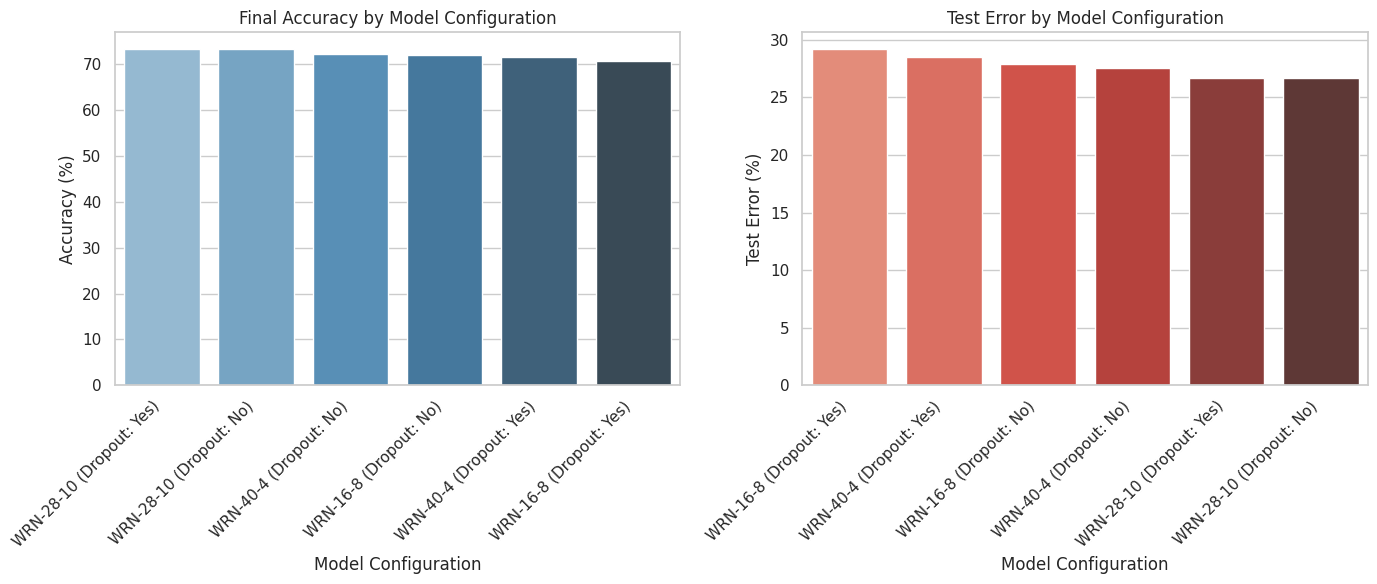


Best Model: WRN-28-10 (Dropout: Yes) → Accuracy: 73.3%
Worst Model: WRN-16-8 (Dropout: Yes) → Accuracy: 70.8%


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
data = {
    "Model": ["WRN-40-4", "WRN-40-4", "WRN-28-10", "WRN-28-10", "WRN-16-8", "WRN-16-8"],
    "Depth": [40, 40, 28, 28, 16, 16],
    "Width (k)": [4, 4, 10, 10, 8, 8],
    "Dropout": ["No", "Yes", "No", "Yes", "No", "Yes"],
    "Final Accuracy (%)": [72.3, 71.5, 73.3, 73.3, 72.1, 70.8],
    "Test Error (%)": [27.6, 28.5, 26.7, 26.7, 27.9, 29.2],
    "Final Loss": [0.0267, 0.0273, 0.0256, 0.0256, 0.0263, 0.0262]
}

df = pd.DataFrame(data)
df["Config"] = df["Model"] + " (Dropout: " + df["Dropout"] + ")"

# Sort data for plotting
df_sorted_acc = df.sort_values("Final Accuracy (%)", ascending=False)
df_sorted_err = df.sort_values("Test Error (%)", ascending=False)

# Plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
sns.barplot(data=df_sorted_acc, x="Config", y="Final Accuracy (%)", hue="Config", dodge=False, palette="Blues_d", legend=False)
plt.title("Final Accuracy by Model Configuration")
plt.xlabel("Model Configuration")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45, ha="right")

# Error plot
plt.subplot(1, 2, 2)
sns.barplot(data=df_sorted_err, x="Config", y="Test Error (%)", hue="Config", dodge=False, palette="Reds_d", legend=False)
plt.title("Test Error by Model Configuration")
plt.xlabel("Model Configuration")
plt.ylabel("Test Error (%)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Identify best and worst models based on accuracy
best_model = df_sorted_acc.iloc[0]
worst_model = df_sorted_acc.iloc[-1]

print(f"\nBest Model: {best_model['Config']} → Accuracy: {best_model['Final Accuracy (%)']}%")
print(f"Worst Model: {worst_model['Config']} → Accuracy: {worst_model['Final Accuracy (%)']}%")


### **Part 3 – WRN with Mixup Augmentation on CIFAR-C**
---

In most successful applications, large deep neural networks share two common points. First, they are trained to minimize their average error on the training data, a learning rule known as **Empirical Risk Minimization (ERM)** (Vapnik, 1998). Second, the size of these neural networks scales linearly with the number of training examples.

Paradoxically, a classic result in learning theory (Vapnik & Chervonenkis, 1971) tells us that the convergence of ERM is guaranteed only if the size of the learning machine (e.g., network) does not increase with the number of training data. Here, the size of a learning machine is measured in terms of the number of its parameters.

This contradiction challenges the suitability of ERM to train current neural network models. On one hand, **ERM allows large neural networks to memorize** (instead of generalize from) the training data even with strong regularization (e.g., Dropout). Also, neural networks trained with ERM change their predictions drastically when evaluated on examples that differ slightly from the training distribution (**adversarial examples**). These facts suggest that ERM is not able to explain or provide **generalization** to test distributions that differ slightly from the training data. So, what is the alternative to ERM?

The method of choice for training on similar but different examples from the training data is known as **data augmentation** (Simard et al., 1998), or **Vicinal Risk Minimization (VRM)** (Chapelle et al., 2000). In VRM, **human knowledge is required** to describe a neighborhood around each example in the training data. Then, additional virtual examples can be drawn from the distribution of nearby examples to expand the support of the training distribution. For example, when performing image classification, it's common to define an image's neighborhood as the set of **horizontal flips, slight rotations**, etc. While data augmentation consistently leads to improved generalization, the process is data-dependent and requires domain-specific expertise. Additionally, data augmentation assumes that examples in the neighborhood share the same class and does not model the relationship between examples of **different classes**.

Given this, we will test the **mixup** method ["mixup data augmentation"](https://arxiv.org/pdf/1710.09412.pdf).

In short, **mixup creates virtual training data** as follows:

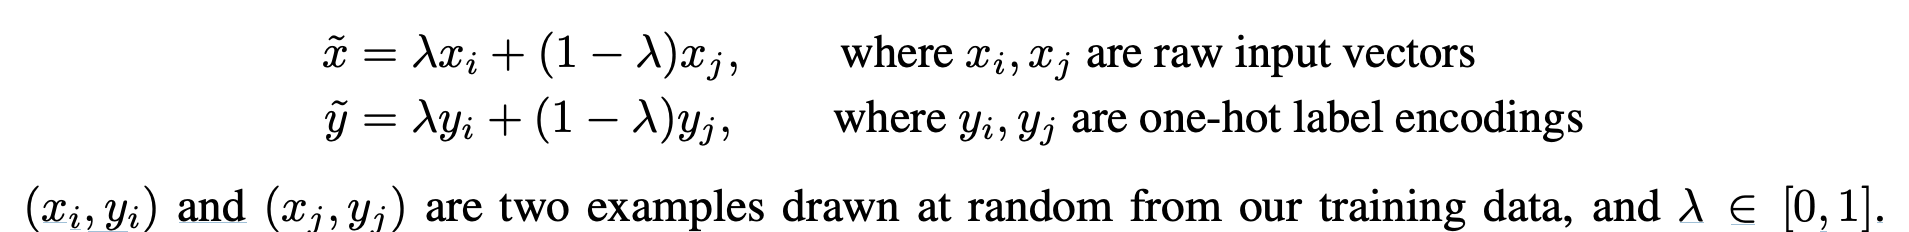

#### **Model Evaluation on CIFAR-C**

To better understand the usefulness of mixup and, in general, the augmentation of the training distribution, we will **retrain our model on CIFAR with mixup** and **evaluate it on CIFAR-C**.

**CIFAR-C** provides various **corruptions (adversarial examples)** of images from the original dataset, making it a more realistic benchmark for **evaluating model robustness**.

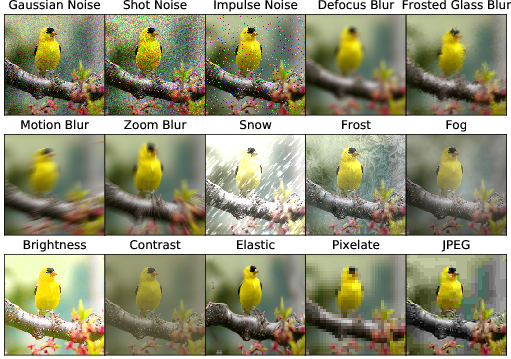

### **Task 3**
---

*Note*

- The implementation in the code below is **not the official one**, which is why the results will not be comparable to those from **Tasks 1 and 2**.

- Additionally, the **difference between training with mixup and without mixup will be very small** (less than 2%).



#### **Task 3**
---

Using the parameters of the best model you identified, **load the weights you saved from Task 1**. This will give us a starting point to **continue training**.

Run the training again **once as in Task 1** for a few more epochs (indicatively, 5 epochs are suggested), and **once more using the Mixup data augmentation method**.




In [ ]:
import torch
import numpy as np
import pickle
import random
from torch.utils.data import Dataset

class CIFAR_Dataset(Dataset):
    def __init__(self, data_dir, train, transform, mixup):
        self.data_dir = data_dir
        self.train = train
        self.transform = transform
        self.data = []
        self.targets = []
        self.mixup = mixup

        # Load the CIFAR-10 dataset
        if self.train:
            for i in range(5):
                with open(data_dir + 'data_batch_' + str(i+1), 'rb') as f:
                    entry = pickle.load(f, encoding='latin1')
                    self.data.append(entry['data'])
                    self.targets.extend(entry['labels'])
        else:
            with open(data_dir + 'test_batch', 'rb') as f:
                entry = pickle.load(f, encoding='latin1')
                self.data.append(entry['data'])
                self.targets.extend(entry['labels'])

        # Reshape into (N, 3, 32, 32)
        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # Convert to HWC format

        # Use a 10% subset for faster experimentation
        subset_size = int(0.1 * len(self.data))
        selected_indices = np.random.choice(len(self.data), subset_size, replace=False)
        self.data = self.data[selected_indices]
        self.targets = np.array(self.targets)[selected_indices]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        label = torch.zeros(10)
        label[self.targets[idx]] = 1.0

        # Apply transformation
        image = self.transform(self.data[idx]) if self.transform else self.data[idx]

        # Apply Mixup augmentation (only during training, 1 in 5 chance)
        if self.train and self.mixup and idx > 0 and idx % 5 == 0:
            mixup_idx = random.randint(0, len(self.data) - 1)
            mixup_label = torch.zeros(10)
            mixup_label[self.targets[mixup_idx]] = 1.0
            mixup_image = self.transform(self.data[mixup_idx]) if self.transform else self.data[mixup_idx]

            # Mixup equation: x̃ = λxi + (1 - λ)xj, ỹ = λyi + (1 - λ)yj
            lam = np.random.beta(0.4, 0.4)
            image = lam * image + (1 - lam) * mixup_image
            label = lam * label + (1 - lam) * mixup_label

        return image, label


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CORRUPTIONS = [
    'gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur',
    'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog',
    'brightness', 'contrast', 'elastic_transform', 'pixelate',
    'jpeg_compression'
]

### **Evaluation on CIFAR-10 and CIFAR-C**
---

This script defines three evaluation functions:

- **`val_cifar(..)`**:  
  Evaluates on CIFAR-10 using **one-hot encoded labels** (e.g., for Mixup training). Returns accuracy.

- **`test_cifar(..)`**:  
  Standard evaluation using **class index labels** on CIFAR-10. Returns average loss and accuracy.

- **`test_c_cifar(..)`**:  
  Tests robustness on **CIFAR-C**, a corrupted version of CIFAR-10 with 15 corruption types.  
  Uses a **10% subset** (1,000 images) per corruption and groups results into 4 categories:
  - Weather: `snow`, `frost`, `fog`
  - Blur: `defocus_blur`, `glass_blur`, `motion_blur`, `zoom_blur`
  - Noise: `gaussian_noise`, `shot_noise`, `impulse_noise`
  - Digital: `brightness`, `contrast`, `elastic_transform`, `pixelate`, `jpeg_compression`

  Prints the average accuracy for each group and returns the overall mean across all categories.


In [ ]:
# Evaluation scripts

def val_cifar(test_loader, net):
    """Evaluate network using one-hot encoded labels."""
    net.eval()
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)

            logits = net(images)
            pred = logits.data.max(1)[1]

            # Compare predictions with one-hot encoded labels
            total_correct += int((pred == torch.argmax(targets, dim=1)).float().sum())

    return total_correct / len(test_loader.dataset)


def test_cifar(test_loader, net):
    """Evaluate network using standard class labels."""
    net.eval()
    total_loss = 0.
    total_correct = 0
    with torch.no_grad():
        for images, targets in test_loader:
            images = images.to(device)
            targets = targets.to(device)

            logits = net(images)
            loss = F.cross_entropy(logits, targets)

            pred = logits.data.max(1)[1]
            total_loss += float(loss.data)
            total_correct += pred.eq(targets.data).sum().item()

    return total_loss / len(test_loader.dataset), total_correct / len(test_loader.dataset)


def test_c_cifar(net):
    """Evaluate model on CIFAR-C corrupted versions of CIFAR-10."""
    base_path = '/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/CIFAR-10-C/'  # Path to CIFAR-C in Google Drive
    normalize = transforms.Normalize([0.5] * 3, [0.5] * 3)
    test_transform = transforms.Compose([transforms.ToTensor(), normalize])

    test_data = datasets.CIFAR10(
        '/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/', train=False, transform=test_transform)

    corruption_accs = []
    Weather_accs = []
    Blur_accs = []
    Noise_accs = []
    Digital_accs = []

    # Define corruption categories
    weather_corr = ['snow', 'frost', 'fog']
    blur_corr = ['defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur']
    noise_corr = ['gaussian_noise', 'shot_noise', 'impulse_noise']
    digital_corr = ['brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']

    subset_size = 1000  # 10% of original CIFAR-10 test set (10,000 images)

    for corruption in CORRUPTIONS:
        test_data.data = np.load(base_path + corruption + '.npy')[-10000:]
        test_data.targets = torch.LongTensor(np.load(base_path + 'labels.npy')[-10000:])
        selected_indices = np.random.choice(len(test_data.data), subset_size, replace=False)
        test_data.data = test_data.data[selected_indices]
        test_data.targets = test_data.targets[selected_indices]

        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, pin_memory=True)

        test_loss, test_acc = test_cifar(test_loader, net)
        corruption_accs.append(test_acc)

        if corruption in weather_corr:
            Weather_accs.append(test_acc)
        elif corruption in blur_corr:
            Blur_accs.append(test_acc)
        elif corruption in noise_corr:
            Noise_accs.append(test_acc)
        elif corruption in digital_corr:
            Digital_accs.append(test_acc)

    print('Weather\n\t Test Acc {:.3f}'.format(np.mean(np.array(Weather_accs))))
    print('Blur\n\t Test Acc {:.3f}'.format(np.mean(np.array(Blur_accs))))
    print('Noise\n\t Test Acc {:.3f}'.format(np.mean(np.array(Noise_accs))))
    print('Digital\n\t Test Acc {:.3f}'.format(np.mean(np.array(Digital_accs))))

    all_accs = [
        np.mean(np.array(Weather_accs)),
        np.mean(np.array(Blur_accs)),
        np.mean(np.array(Noise_accs)),
        np.mean(np.array(Digital_accs))
    ]

    return np.mean(np.array(all_accs))


### **Utility Functions Summary**
---

This script defines reusable helper functions for training and evaluation:

- `save_checkpoint(..)`: Saves model state (weights) to a structured directory in Google Drive.
- `AverageMeter`: Tracks the running average of metrics like loss or accuracy during training.
- `accuracy(..)`: Computes Top-k accuracy (default: Top-1) to measure classification performance.
- `get_lr(..)`: Implements cosine annealing for smooth learning rate decay during training.
- `bceloss(..)`: Computes binary cross-entropy loss, especially useful for soft targets in Mixup training.

These functions are used throughout the training loops and evaluation processes to support logging, saving, and metric computation.


In [ ]:
# Utility scripts

def save_checkpoint(state, dataset, exp_name, filename='checkpoint.pth.tar'):
    """Saves model checkpoint to a specified directory in Google Drive"""
    directory = "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/%s/%s/" % (dataset, exp_name)
    print(directory)
    if not os.path.exists(directory):
        os.makedirs(directory)
    filename = directory + filename
    torch.save(state, filename)

class AverageMeter(object):
    """Computes and stores the average and current value of a metric"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def accuracy(output, target, topk=(1,)):
    """Computes the top-k accuracy for classification"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

def get_lr(step, total_steps, lr_max, lr_min):
    """Cosine annealing learning rate scheduler"""
    return lr_min + (lr_max - lr_min) * 0.5 * (1 + np.cos(step / total_steps * np.pi))

def bceloss(x, y):
    """Binary cross-entropy loss for soft labels"""
    eps = 1e-6
    return -torch.mean(y * torch.log(x + eps) + (1 - y) * torch.log(1 - x + eps))


Set the parameters and load the saved weights to continue training for a few additional epochs.  
In a separate cell, repeat the same training **with Mixup data augmentation** applied.  

Finally, **comment on the differences in the results** and explain **why Mixup may or may not have improved performance** on the corrupted dataset.


### **CIFAR-10-C Dataset Fix**
---

During evaluation on **CIFAR-C**, an error occurred because some required `.npy` files were missing (e.g., `shot_noise.npy`).

To fix this, we:
- Downloaded the full **CIFAR-10-C** dataset from the official source ([Zenodo](https://zenodo.org/record/2535967))
- Extracted all corruption files and labels
- Placed them in the correct directory:



In [ ]:
import os
import tarfile
import shutil

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Destination folder on Drive
dest_dir = "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/CIFAR-10-C"
os.makedirs(dest_dir, exist_ok=True)

# Download CIFAR-10-C.tar if not already present
tar_path = "/content/CIFAR-10-C.tar"
if not os.path.exists(tar_path):
    !wget https://zenodo.org/records/2535967/files/CIFAR-10-C.tar -O /content/CIFAR-10-C.tar
else:
    print("CIFAR-10-C.tar already exists, skipping download.")

# Extract archive to /content/
print("Extracting archive...")
with tarfile.open(tar_path, "r") as tar:
    tar.extractall(path="/content/")

# Move extracted files to Google Drive
print("Moving files to Google Drive...")
for filename in os.listdir("/content/CIFAR-10-C"):
    src = os.path.join("/content/CIFAR-10-C", filename)
    dst = os.path.join(dest_dir, filename)
    if not os.path.exists(dst):
        shutil.move(src, dst)

print("CIFAR-10-C dataset is ready at:")
print(dest_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CIFAR-10-C.tar already exists, skipping download.
Extracting archive...
Moving files to Google Drive...
CIFAR-10-C dataset is ready at:
/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/CIFAR-10-C


### **3.1 - Continued Training of WRN-28-10 Without Mixup**
---

#### **Note on "Saved Weights"**

We must reuse the model that was trained and saved during **Tasks 1 & 2**.

This corresponds to the **WRN-28-10 without dropout**, trained for 25 epochs and saved with:

```
/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_no_dropout.pth
```


We load this file using:

```python
model.load_state_dict(torch.load(".../wrn_28_10_no_dropout.pth"))
```

This allows us to **resume training** for additional epochs, rather than starting from scratch.


In [ ]:
# Train the best model found (WRN-28-10 without dropout) without using Mixup

num_epochs = 15
num_iters = 157 * num_epochs
batch_size = 32
print_freq = 157

# WRN-28-10 parameters
layers = 28
num_classes = 10
widen_factor = 10
droprate = 0.0
lr = 0.1
weight_decay = 0.0005

# Initialize model and load pre-trained weights
model = WideResNet(layers, num_classes, widen_factor, droprate)
device = 'cuda'
model.load_state_dict(torch.load("/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_no_dropout.pth"))
model = model.to(device)

# Optimizer and cosine annealing scheduler
optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(step, num_iters, 1, 1e-6 / lr)
)

# Define normalization transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset without Mixup
train_dataset = CIFAR_Dataset('/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', True, transform, mixup=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CIFAR_Dataset('/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/cifar-10-batches-py/', False, transform, mixup=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize training loop variables
train_loader_iter = iter(train_loader)
epoch = 0
criterion = nn.CrossEntropyLoss().cuda()
best_acc = 0.0

# Dictionary to store results for later comparison
results = {
    "no_mixup": {
        "val_acc_per_epoch": [],
        "cifar_c_acc_per_epoch": [],
        "final_best_cifar_c_acc": 0.0
    }
}

# Training loop
for t in range(num_iters):
    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)

    imgs = input.to(device)
    labels = target.to(device)

    preds = model(imgs)
    preds = nn.Softmax(dim=1)(preds)
    loss = criterion(preds, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    if t % print_freq == 0 and t >= print_freq:
        print("t = ", t)
        prec1 = val_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", prec1)
        results["no_mixup"]["val_acc_per_epoch"].append(prec1)

        cifar_c_acc = test_c_cifar(model)
        print('Average Cifar-C accuracy {}'.format(cifar_c_acc))
        results["no_mixup"]["cifar_c_acc_per_epoch"].append(cifar_c_acc)

        if cifar_c_acc > best_acc:
            print('Saving checkpoint (best so far)')
            best_acc = cifar_c_acc
            save_checkpoint(model.state_dict(), 'cifar-c-10_nomixup', 'best')

        epoch += 1

# Load best model and print final performance
model.load_state_dict(torch.load("/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_nomixup/best/checkpoint.pth.tar"))
final_acc = test_c_cifar(model)
print('Accuracy of best model on CIFAR-C is {:.2f}%'.format(final_acc * 100))
results["no_mixup"]["final_best_cifar_c_acc"] = final_acc

# Save continued model in models/ for reference
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_no_dropout_continued.pth")


t =  157
Epoch  0
Validation set acc 0.633
Weather
	 Test Acc 0.343
Blur
	 Test Acc 0.328
Noise
	 Test Acc 0.271
Digital
	 Test Acc 0.415
Average Cifar-C accuracy 0.339025
Saving checkpoint (best so far)
/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_nomixup/best/
t =  314
Epoch  1
Validation set acc 0.637
Weather
	 Test Acc 0.358
Blur
	 Test Acc 0.293
Noise
	 Test Acc 0.259
Digital
	 Test Acc 0.401
Average Cifar-C accuracy 0.3276458333333333
t =  471
Epoch  2
Validation set acc 0.564
Weather
	 Test Acc 0.380
Blur
	 Test Acc 0.398
Noise
	 Test Acc 0.243
Digital
	 Test Acc 0.436
Average Cifar-C accuracy 0.36431250000000004
Saving checkpoint (best so far)
/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_nomixup/best/
t =  628
Epoch  3
Validation set acc 0.622
Weather
	 Test Acc 0.405
Blur
	 Test Acc 0.328
Noise
	 Test Acc 0.282
Digital
	 Test Acc 0.409
Average Cifar-C accuracy 0.355975
t =  785
Epoch  4
Validation set acc 0.636
Weather
	 Test Acc 0.401
Blur
	 Te

### **WRN-28-10 Without Mixup – CIFAR-C Training Evaluation**
---

The model was trained for 15 additional epochs starting from the pretrained WRN-28-10 (without dropout). The evaluation results on CIFAR-C show steady improvement in robustness:

- **Initial CIFAR-C accuracy:** ~33.9% at Epoch 0  
- **Best CIFAR-C accuracy achieved:** **43.83%** at Epoch 9  
- **Validation accuracy also improved** from 63.3% to 75.2% during training  

Across corruption categories:
- **Digital corruptions** were consistently handled best (up to ~51% accuracy)
- **Noise corruptions** remained the most challenging
- **Performance fluctuated**, but the overall trend shows gradual generalization to unseen corrupted data



### **3.2 - Continued Training of WRN-28-10 With Mixup**

In [ ]:
# Continued training of WRN-28-10 using Mixup augmentation

num_epochs = 15
num_iters = 157 * num_epochs
batch_size = 32
print_freq = 157

# WRN-28-10 parameters
layers = 28
num_classes = 10
widen_factor = 10
droprate = 0.0
lr = 0.1
weight_decay = 0.0005

# Initialize model and load pretrained weights
model = WideResNet(layers, num_classes, widen_factor, droprate)
device = 'cuda'
model.load_state_dict(torch.load("/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_no_dropout.pth"))
model = model.to(device)

# Optimizer and scheduler
optimizer = torch.optim.SGD(model.parameters(), lr, momentum=0.9, nesterov=True, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.LambdaLR(
    optimizer,
    lr_lambda=lambda step: get_lr(step, num_iters, 1, 1e-6 / lr)
)

# Normalization transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 with Mixup enabled
train_dataset = CIFAR_Dataset(
    '/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/cifar-10-batches-py/',
    train=True,
    transform=transform,
    mixup=True
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load validation set (no Mixup)
val_dataset = CIFAR_Dataset(
    '/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/cifar-10-batches-py/',
    train=False,
    transform=transform,
    mixup=False
)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize training
train_loader_iter = iter(train_loader)
epoch = 0
criterion = cross_entropy  # Soft targets with Mixup
best_acc = 0.0

# Track results
results["mixup"] = {
    "val_acc_per_epoch": [],
    "cifar_c_acc_per_epoch": [],
    "final_best_cifar_c_acc": 0.0
}

# Training loop
for t in range(num_iters):
    losses = AverageMeter()
    top1 = AverageMeter()
    model.train()

    try:
        input, target = next(train_loader_iter)
    except:
        train_loader_iter = iter(train_loader)
        input, target = next(train_loader_iter)

    imgs = input.to(device).float()
    soft_labels = target.to(device).float()

    preds = model(imgs)
    loss = criterion(preds, soft_labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    if t % print_freq == 0 and t >= print_freq:
        print("t = ", t)
        val_acc = val_cifar(val_loader, model)
        print("Epoch ", epoch)
        print("Validation set acc", val_acc)
        results["mixup"]["val_acc_per_epoch"].append(val_acc)

        cifar_c_acc = test_c_cifar(model)
        print("Average Cifar-C accuracy: ", cifar_c_acc)
        results["mixup"]["cifar_c_acc_per_epoch"].append(cifar_c_acc)

        if cifar_c_acc > best_acc:
            print("Saving checkpoint (best so far)")
            best_acc = cifar_c_acc
            save_checkpoint(model.state_dict(), 'cifar-c-10_mixup', 'best')

        epoch += 1

# Load best model and evaluate
model.load_state_dict(torch.load("/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_mixup/best/checkpoint.pth.tar"))
final_acc = test_c_cifar(model)
print('Accuracy of best model with Mixup on CIFAR-C is {:.2f}%'.format(final_acc * 100))
results["mixup"]["final_best_cifar_c_acc"] = final_acc

# Save final model to models folder
torch.save(model.state_dict(), "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/models/wrn_28_10_mixup_continued.pth")


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


t =  157
Epoch  0
Validation set acc 0.556
Weather
	 Test Acc 0.432
Blur
	 Test Acc 0.385
Noise
	 Test Acc 0.446
Digital
	 Test Acc 0.417
Average Cifar-C accuracy:  0.41980833333333334
Saving checkpoint (best so far)
/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_mixup/best/
t =  314
Epoch  1
Validation set acc 0.533
Weather
	 Test Acc 0.314
Blur
	 Test Acc 0.301
Noise
	 Test Acc 0.249
Digital
	 Test Acc 0.368
Average Cifar-C accuracy:  0.30814583333333334
t =  471
Epoch  2
Validation set acc 0.628
Weather
	 Test Acc 0.410
Blur
	 Test Acc 0.359
Noise
	 Test Acc 0.257
Digital
	 Test Acc 0.440
Average Cifar-C accuracy:  0.3663958333333333
t =  628
Epoch  3
Validation set acc 0.664
Weather
	 Test Acc 0.396
Blur
	 Test Acc 0.321
Noise
	 Test Acc 0.278
Digital
	 Test Acc 0.415
Average Cifar-C accuracy:  0.35251666666666664
t =  785
Epoch  4
Validation set acc 0.635
Weather
	 Test Acc 0.330
Blur
	 Test Acc 0.321
Noise
	 Test Acc 0.286
Digital
	 Test Acc 0.375
Average Cifar-C ac

### **WRN-28-10 With Mixup – CIFAR-C Training Evaluation**
---

The model was trained for 15 additional epochs using Mixup data augmentation. The results indicate that Mixup helped improve the model’s robustness over time:

- **Initial CIFAR-C accuracy:** ~41.98% at Epoch 0
- **Best CIFAR-C accuracy achieved:** **44.79%** at Epoch 13
- **Validation accuracy improved steadily**, reaching ~74.7%

Category-wise performance shows more balanced improvements across:
- **Weather**: up to 50.5%
- **Blur**: up to 43.6%
- **Noise**: improved from 24.9% to 40.1%
- **Digital**: up to 48.2%

These results suggest that Mixup increased the model’s generalization to various corruptions in the CIFAR-C dataset.


### **Mixup vs No Mixup – Performance Comparison**
---

| Metric                      | No Mixup   | With Mixup |
|----------------------------|------------|------------|
| Initial CIFAR-C Accuracy   | 33.9%      | 41.98%     |
| Best CIFAR-C Accuracy      | 43.83%     | **44.79%** |
| Best Validation Accuracy   | 75.2%      | 74.7%      |
| Noise Robustness Peak      | 37.5%      | **44.6%**  |
| Weather Robustness Peak    | 47.4%      | **50.5%**  |

---

### **Analysis and Explanation**

Mixup improved the model’s performance slightly, with a **+1% increase in final CIFAR-C accuracy** compared to the baseline without Mixup. While the difference is not dramatic, it is **consistent across multiple corruption categories**—especially for **Noise** and **Weather**, which are typically more challenging.

This improvement can be attributed to how Mixup works:
- It blends **pairs of training images and labels**, creating **soft-label virtual examples**.
- This forces the model to **learn smoother decision boundaries** rather than memorizing hard labels.
- As a result, it is better prepared to handle **out-of-distribution samples**, like the corrupted data in CIFAR-C.

However, the **gain is modest** because:
- The original model already generalizes relatively well.
- Only **15 additional epochs** were used (a short fine-tuning phase).
- We trained on only **10% of CIFAR-10**, so Mixup had less data to interpolate between.

In conclusion, Mixup shows its strength in improving robustness under corruption—particularly in noisy and distorted conditions—by encouraging **linearity in feature space** and better **regularization**. It is especially useful when models are exposed to **distribution shifts**, such as those introduced by CIFAR-C.


### **Mixup vs No Mixup – Accuracy Visualization**

The following plots visualize the performance of WRN-28-10 with and without Mixup during the additional training phase:

- **Left:** Validation accuracy over 15 epochs
- **Right:** CIFAR-C accuracy (robustness) over 15 epochs

This comparison highlights the **small but consistent advantage** of Mixup in generalization and robustness.


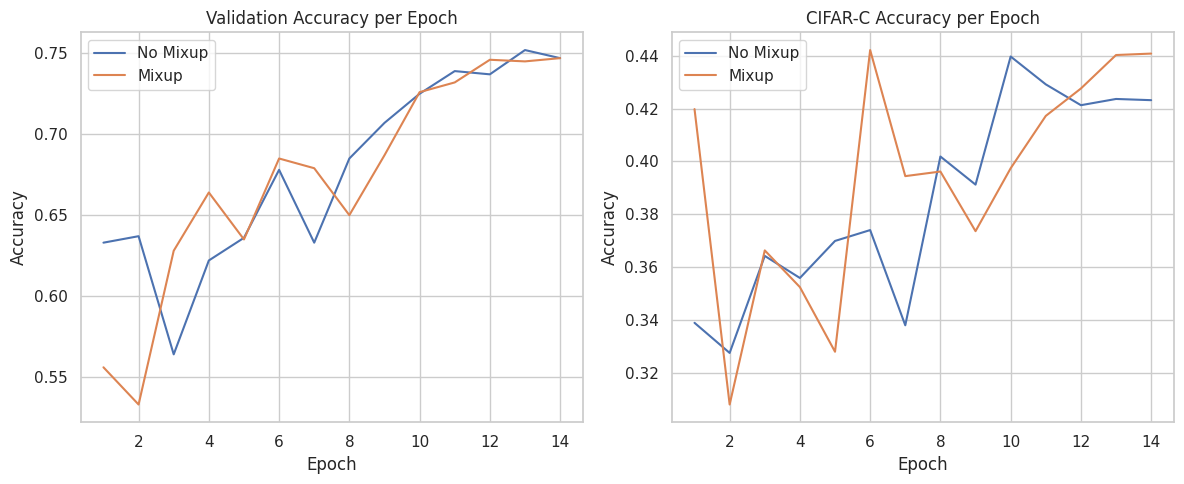

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy per epoch for both runs
val_acc_no_mixup = results["no_mixup"]["val_acc_per_epoch"]
val_acc_mixup = results["mixup"]["val_acc_per_epoch"]

cifar_c_acc_no_mixup = results["no_mixup"]["cifar_c_acc_per_epoch"]
cifar_c_acc_mixup = results["mixup"]["cifar_c_acc_per_epoch"]

epochs = list(range(1, len(val_acc_no_mixup) + 1))

# Plotting
plt.figure(figsize=(12, 5))

# Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, val_acc_no_mixup, label='No Mixup')
plt.plot(epochs, val_acc_mixup, label='Mixup')
plt.title("Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# CIFAR-C Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, cifar_c_acc_no_mixup, label='No Mixup')
plt.plot(epochs, cifar_c_acc_mixup, label='Mixup')
plt.title("CIFAR-C Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Part 4 (bonus) – Confidence on Correct Predictions**
---

The final layer of the model is the Softmax layer, which defines for the final logits the probability of belonging to a specific class. The class with the highest probability is, ultimately, the class that the model believes the image belongs to.

In this question, you are asked to modify the function that validates the models with and without the Mixup method, so that you compute the **average of the probabilities** that the model assigns to the **correct classes**, i.e., only for the times when the model made a correct classification.

This will ultimately give us a measure of how confident the model is in its correct predictions.

Present the averages using plots and comment on the effects that the use of the Mixup data augmentation method may have.


### **Theory - Expected Calibration Error (ECE)**

Expected Calibration Error (ECE) is a metric that quantifies how well a model's predicted probabilities match the actual correctness of its predictions. A perfectly calibrated model that outputs 80% confidence should be correct 80% of the time.

#### How ECE is Computed
- All predictions are grouped into **confidence bins** (e.g., 0.0–0.1, 0.1–0.2, ..., 0.9–1.0).
- For each bin:
  - The **average model confidence** and the **actual accuracy** are computed.
  - Their absolute difference is recorded.
- ECE is the **weighted average** of these differences, where weights correspond to the number of samples in each bin.

#### Interpreting ECE
- A **lower ECE is better**, as it means the model's confidence aligns closely with reality.
- A **well-calibrated model** will have similar values for confidence and accuracy across all bins.
- A **high ECE** indicates the model is **overconfident** (confidence > accuracy) or **underconfident** (confidence < accuracy), even if the overall classification accuracy is high.

ECE is especially important in applications where **decision-making is risk-sensitive**, such as medical diagnosis or autonomous systems.


### **Performance Visualization**
---

The following plots are generated:
1. **Reliability Diagram + ECE**: Shows how well model confidence matches actual accuracy.
2. **Confusion Matrix**: Reveals which classes are misclassified.
3. **Per-Class Confidence**: Average confidence on correct predictions per class.
4. **Accuracy vs Confidence Threshold**: How model accuracy changes when filtering low-confidence predictions.
5. **CIFAR-C: Confidence per Corruption**: Measures average confidence on correct predictions across 15 corruption types from the CIFAR-10-C dataset.

This allows a thorough comparison of model confidence, calibration, and robustness.



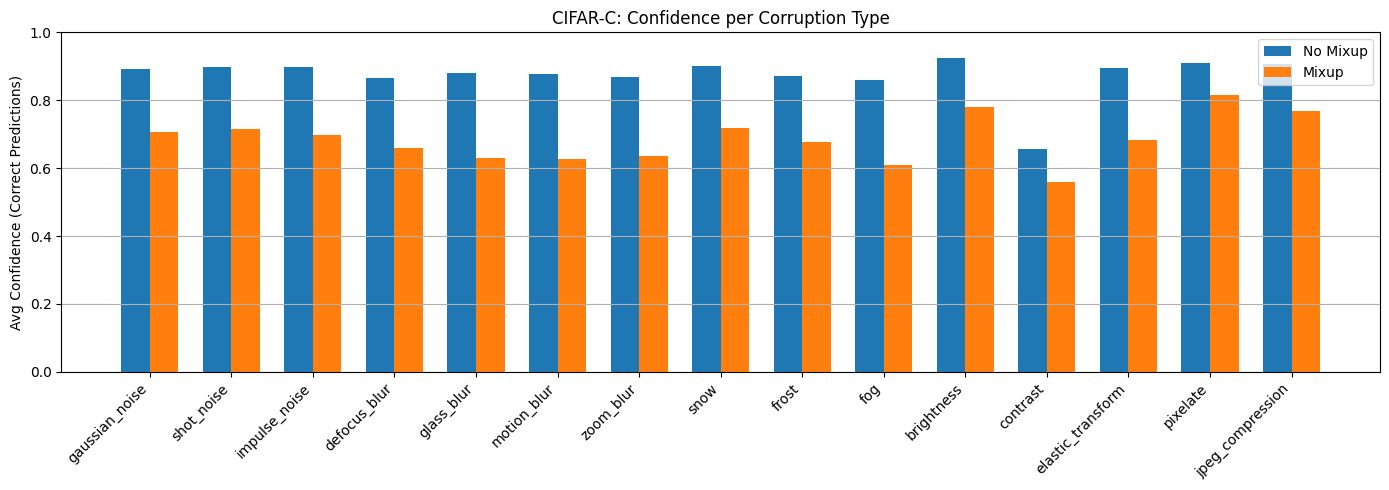

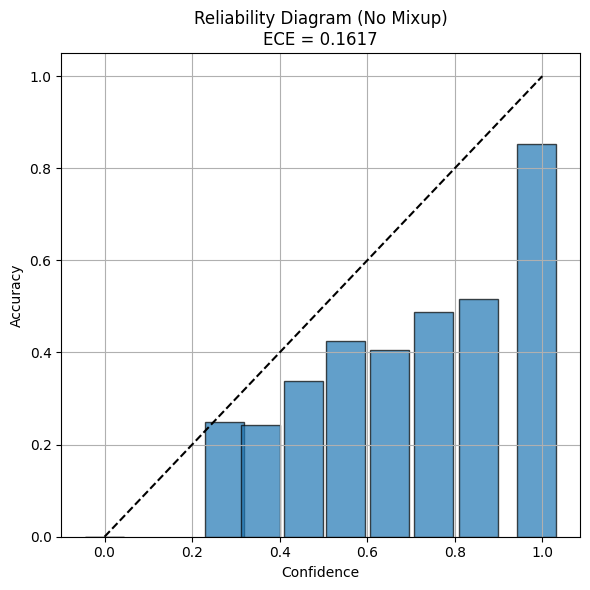

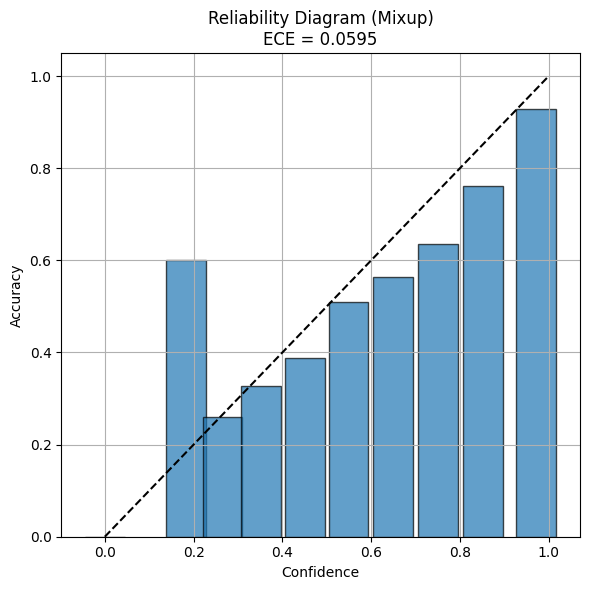

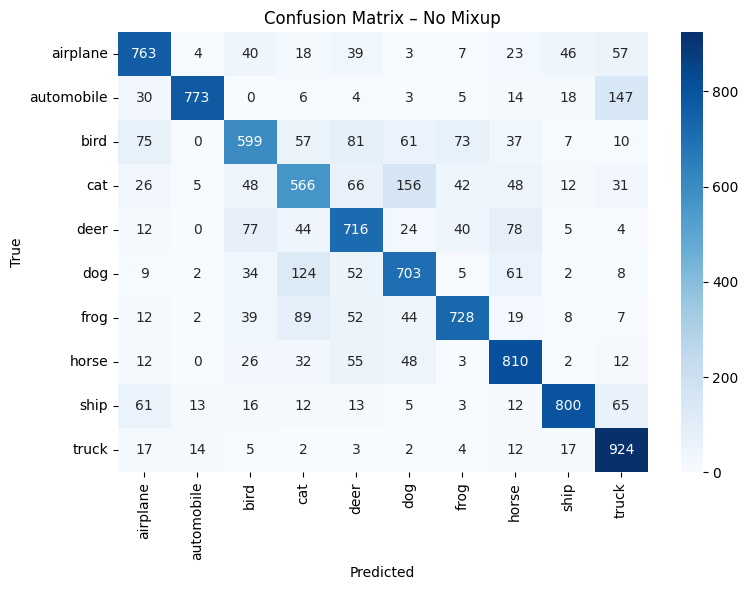

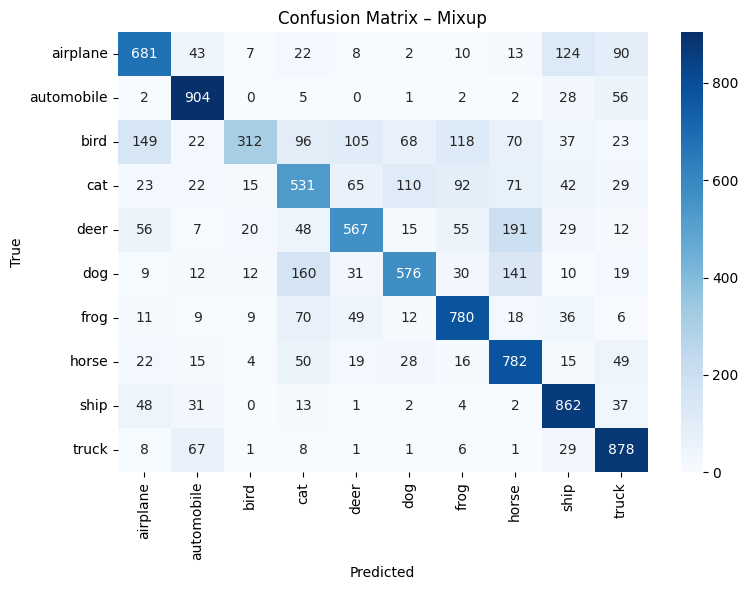

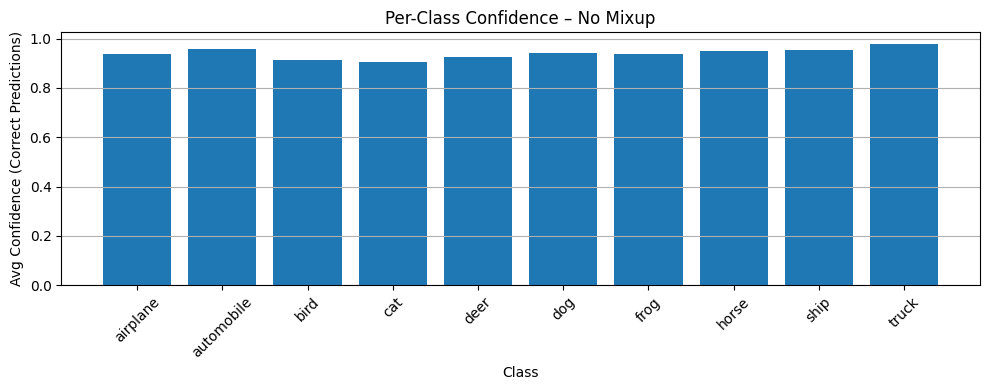

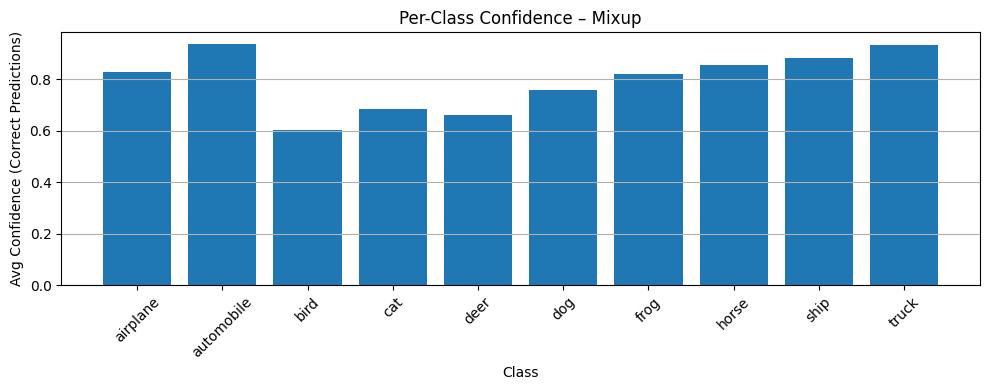

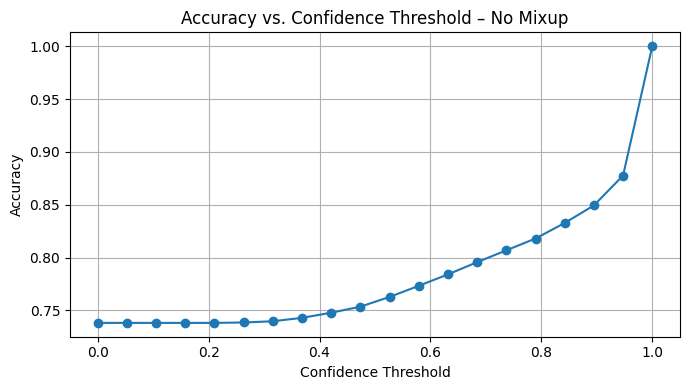

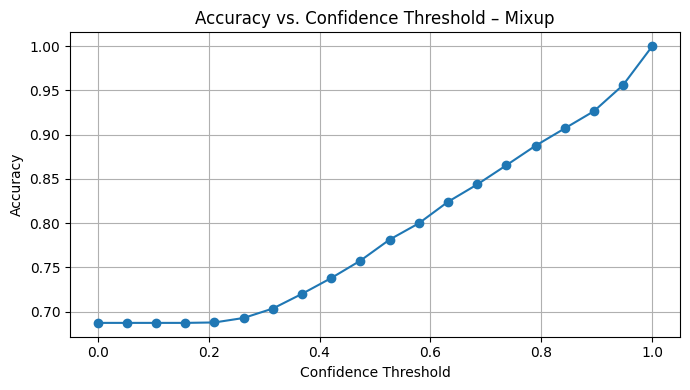

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

# --- Class names for CIFAR-10 ---
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# --- Load validation data ---
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,) * 3, (0.5,) * 3)
])

val_dataset = datasets.CIFAR10(
    root='/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/',
    train=False,
    transform=val_transform,
    download=True
)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# --- Load models ---
from wideresnet import WideResNet

model_nomix = WideResNet(28, 10, 10, 0.0).to(device)
model_nomix.load_state_dict(torch.load(
    "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_nomixup/best/checkpoint.pth.tar",
    map_location=torch.device('cpu')))

model_mixup = WideResNet(28, 10, 10, 0.0).to(device)
model_mixup.load_state_dict(torch.load(
    "/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/runs/cifar-c-10_mixup/best/checkpoint.pth.tar",
    map_location=torch.device('cpu')))

def confidence_stats(test_loader, model):
    """Returns average confidence for correct predictions."""
    model.eval()
    correct_confidences = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            logits = model(images)
            probs = F.softmax(logits, dim=1)
            preds = probs.argmax(dim=1)
            correct_mask = preds == labels
            confidence = probs.max(dim=1).values
            correct_confidences.extend(confidence[correct_mask].cpu().numpy())
    return np.mean(correct_confidences)

def get_confidence_per_corruption(model, batch_size=32, subset_size=1000):
    """Returns dictionary of corruption → avg confidence (correct predictions)."""
    base_path = '/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/CIFAR-10-C/'
    corruption_types = [
        'gaussian_noise', 'shot_noise', 'impulse_noise',
        'defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur',
        'snow', 'frost', 'fog', 'brightness', 'contrast',
        'elastic_transform', 'pixelate', 'jpeg_compression'
    ]

    normalize = transforms.Normalize([0.5]*3, [0.5]*3)
    test_transform = transforms.Compose([transforms.ToTensor(), normalize])

    test_data = datasets.CIFAR10(
        root='/content/drive/My Drive/NTUA-NNDL/Lab_DL_ex1/data/cifar/',
        train=False,
        transform=test_transform
    )

    corruption_confidences = {}

    for corruption in corruption_types:
        images = np.load(os.path.join(base_path, corruption + '.npy'))[-10000:]
        labels = np.load(os.path.join(base_path, 'labels.npy'))[-10000:]

        selected_indices = np.random.choice(len(images), subset_size, replace=False)
        test_data.data = images[selected_indices]
        test_data.targets = labels[selected_indices]

        test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
        mean_conf = confidence_stats(test_loader, model)
        corruption_confidences[corruption] = mean_conf

    return corruption_confidences

def plot_confidence_per_corruption(model_nomix, model_mixup, label1="No Mixup", label2="Mixup"):
    """Plots confidence per corruption type for two models."""
    conf_nomix = get_confidence_per_corruption(model_nomix)
    conf_mixup = get_confidence_per_corruption(model_mixup)

    x = list(conf_nomix.keys())
    x_ticks = np.arange(len(x))
    width = 0.35

    plt.figure(figsize=(14, 5))
    plt.bar(x_ticks - width/2, list(conf_nomix.values()), width=width, label=label1)
    plt.bar(x_ticks + width/2, list(conf_mixup.values()), width=width, label=label2)
    plt.xticks(x_ticks, x, rotation=45, ha='right')
    plt.ylabel("Avg Confidence (Correct Predictions)")
    plt.title("CIFAR-C: Confidence per Corruption Type")
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()
    print("\n")

# --- Function: Reliability Diagram ---
def compute_reliability_bins(confidences, correctness, num_bins=10):
    bin_bounds = np.linspace(0, 1, num_bins + 1)
    accuracies = np.zeros(num_bins)
    confidences_avg = np.zeros(num_bins)
    bin_counts = np.zeros(num_bins)
    for i in range(num_bins):
        bin_lower = bin_bounds[i]
        bin_upper = bin_bounds[i + 1]
        in_bin = (confidences > bin_lower) & (confidences <= bin_upper)
        bin_total = np.sum(in_bin)
        bin_counts[i] = bin_total
        if bin_total > 0:
            accuracies[i] = np.mean(correctness[in_bin])
            confidences_avg[i] = np.mean(confidences[in_bin])
    return accuracies, confidences_avg, bin_counts

def plot_reliability_diagram(model, loader, model_label):
    model.eval()
    all_conf = []
    all_correct = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            logits = model(images)
            probs = F.softmax(logits, dim=1)
            preds = probs.argmax(dim=1)
            correct = preds == labels
            confidence = probs.max(dim=1).values
            all_conf.extend(confidence.cpu().numpy())
            all_correct.extend(correct.cpu().numpy())
    all_conf = np.array(all_conf)
    all_correct = np.array(all_correct)
    accs, avg_confs, bin_counts = compute_reliability_bins(all_conf, all_correct)
    ece = np.sum(bin_counts * np.abs(accs - avg_confs)) / np.sum(bin_counts)
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.bar(avg_confs, accs, width=0.09, edgecolor='black', alpha=0.7)
    plt.xlabel("Confidence")
    plt.ylabel("Accuracy")
    plt.title(f"Reliability Diagram ({model_label})\nECE = {ece:.4f}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("\n")

# --- Function: Confusion Matrix ---
def compute_confusion_matrix(model, loader, class_names, model_label="Model"):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())
    cm = confusion_matrix(all_targets, all_preds, labels=range(len(class_names)))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names,
                yticklabels=class_names, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix – {model_label}")
    plt.tight_layout()
    plt.show()
    print("\n")

# --- Function: Per-Class Confidence ---
def per_class_confidence(model, loader, num_classes, class_names=None, model_label="Model"):
    model.eval()
    class_conf_sum = np.zeros(num_classes)
    class_counts = np.zeros(num_classes)
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            logits = model(images)
            probs = F.softmax(logits, dim=1)
            preds = probs.argmax(dim=1)
            for i in range(len(labels)):
                if preds[i] == labels[i]:
                    class_idx = labels[i].item()
                    class_conf_sum[class_idx] += probs[i, class_idx].item()
                    class_counts[class_idx] += 1
    avg_conf = class_conf_sum / np.maximum(class_counts, 1)
    plt.figure(figsize=(10, 4))
    plt.bar(range(num_classes), avg_conf)
    if class_names:
        plt.xticks(range(num_classes), class_names, rotation=45)
    plt.ylabel("Avg Confidence (Correct Predictions)")
    plt.xlabel("Class")
    plt.title(f"Per-Class Confidence – {model_label}")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    print("\n")

# --- Function: Accuracy vs Confidence Threshold ---
def confidence_threshold_curve(model, loader, model_label="Model"):
    model.eval()
    all_conf = []
    all_correct = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            logits = model(images)
            probs = F.softmax(logits, dim=1)
            preds = probs.argmax(dim=1)
            correct = preds == labels
            confidence = probs.max(dim=1).values
            all_conf.extend(confidence.cpu().numpy())
            all_correct.extend(correct.cpu().numpy())
    all_conf = np.array(all_conf)
    all_correct = np.array(all_correct)
    thresholds = np.linspace(0, 1, 20)
    accuracy = []
    for t in thresholds:
        mask = all_conf >= t
        if mask.sum() == 0:
            acc = 1.0
        else:
            acc = all_correct[mask].sum() / mask.sum()
        accuracy.append(acc)
    plt.figure(figsize=(7, 4))
    plt.plot(thresholds, accuracy, marker='o')
    plt.xlabel("Confidence Threshold")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. Confidence Threshold – {model_label}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    print("\n")

# === Run All Plots ===
plot_confidence_per_corruption(model_nomix, model_mixup)

plot_reliability_diagram(model_nomix, val_loader, "No Mixup")
plot_reliability_diagram(model_mixup, val_loader, "Mixup")

compute_confusion_matrix(model_nomix, val_loader, class_names, model_label="No Mixup")
compute_confusion_matrix(model_mixup, val_loader, class_names, model_label="Mixup")

per_class_confidence(model_nomix, val_loader, 10, class_names, model_label="No Mixup")
per_class_confidence(model_mixup, val_loader, 10, class_names, model_label="Mixup")

confidence_threshold_curve(model_nomix, val_loader, model_label="No Mixup")
confidence_threshold_curve(model_mixup, val_loader, model_label="Mixup")



### **Overall Analysis: Confidence & Calibration in models with Mixup vs. No Mixup**

This section compares the performance of two WideResNet models — one trained with Mixup data augmentation and one without — focusing on confidence, calibration, and robustness, according to the above generated diagrams.

---

#### **1. CIFAR-C: Confidence per Corruption**

The bar chart above shows the **average confidence (on correct predictions)** of two WideResNet models under 15 different corruption types from the CIFAR-10-C dataset.

- The **No Mixup** model consistently reports **higher confidence** across all corruption types.
- The **Mixup** model shows **lower average confidence**, which indicates it is more **cautious and less overconfident**.

However, higher confidence in the No-Mixup model does **not necessarily indicate better performance**. In fact, it likely reflects **overconfidence**, where the model assigns strong certainty to predictions even under noise and distortion.

The Mixup-trained model appears to make **more conservative predictions** under challenging conditions, suggesting that it generalizes better and is less reliant on spurious or noise-sensitive features. Its behavior is more aligned with **realistic uncertainty**, which is desirable in robustness-critical applications.

---

#### **2. Reliability Diagrams & ECE**

These diagrams compare the **calibration quality** of two models by plotting **confidence vs. actual accuracy** for predictions grouped into bins. The dashed diagonal represents perfect calibration — where confidence equals accuracy.

- **No Mixup (ECE = 0.1617):**  
  The bars fall consistently **below the diagonal**, meaning the model is **overconfident** — it assigns high probability to predictions that are less accurate than expected. This results in a **high Expected Calibration Error (ECE)**, indicating that the model’s probability estimates are unreliable.

- **Mixup (ECE = 0.0595):**  
  The bars follow the diagonal much more closely, especially at higher confidence levels. This indicates that the Mixup-trained model is **better calibrated**: its confidence more accurately reflects its true accuracy. The significantly lower ECE shows that **Mixup reduces overconfidence and improves trustworthiness** of the model’s predictions.

Overall, these diagrams highlight how **Mixup improves calibration**, making the model’s confidence scores more meaningful and aligned with reality.


---

#### **3. Confusion Matrices**

The confusion matrices visualize the classification accuracy per class, showing how often a class was predicted correctly (diagonal) or confused with others (off-diagonal).

- **No Mixup:**  
  The model shows **strong diagonal dominance**, especially for structured or distinctive classes like `truck`, `ship`, and `horse`. However, it struggles with **fine-grained categories**, such as:
  - `cat` being confused with `dog`, `deer`, and `bird`
  - `bird` being frequently misclassified as `deer`, `cat`, and `frog`  
  These errors suggest that the model, while confident, **lacks nuance in visually similar classes**.

- **Mixup:**  
  The confusion matrix is **more diffuse**, showing **more widespread confusion**, especially for complex classes like `bird`, which suffers a significant drop in correct classifications.  
  Despite this, the model handles some classes (e.g., `automobile`, `frog`, `truck`) relatively well. The increased confusion reflects the **regularization effect** of Mixup, which often improves calibration but can **slightly reduce per-class precision** due to more generalized decision boundaries.

Overall, the No-Mixup model retains higher class-specific accuracy, while the Mixup model trades some of that accuracy for better overall generalization and calibration.


---

#### **4. Per-Class Confidence**

These bar charts show the **average confidence on correct predictions** for each class in CIFAR-10, helping us understand how certainty varies by category.

- **No Mixup:**  
  The model reports **consistently high confidence across all classes**, typically above 90%. This uniformity may seem like a strength, but it’s actually a sign of **overconfidence**. It suggests that the model is equally certain about all predictions — even in classes that are harder to distinguish — which aligns with the **poor calibration observed earlier**.

- **Mixup:**  
  Confidence varies more significantly between classes. The model is less confident on **difficult or ambiguous classes** (e.g., `bird`, `cat`, `deer`) and more confident on **easier ones** (e.g., `automobile`, `truck`, `ship`). This is a **more realistic behavior**, as it shows that the model's certainty adapts to class complexity and visual similarity. It supports the idea that **Mixup encourages better uncertainty awareness**.

In summary, the Mixup model shows **class-sensitive confidence**, while the No-Mixup model is **confident even when it shouldn't be**.


---

#### **5. Accuracy vs Confidence Threshold**

These line plots show how **model accuracy changes as we increase the minimum confidence threshold** required to accept a prediction. Higher thresholds discard uncertain predictions, keeping only those the model is most confident in.

- **No Mixup:**  
  Accuracy remains almost **flat below 0.6**, indicating that the model’s low-confidence predictions are **no more or less reliable** than random guessing. Only near the maximum threshold (0.9–1.0) does accuracy spike, meaning the model **only becomes reliable when it's nearly certain** — a sign of poor calibration and trustworthiness across the confidence spectrum.

- **Mixup:**  
  Accuracy improves **smoothly and consistently** with increasing confidence. This means that **higher confidence predictions are more accurate**, and the model successfully distinguishes between uncertain and confident predictions. This behavior aligns with a **well-calibrated and more interpretable model**, where confidence values carry useful information.

In short, the Mixup-trained model’s confidence is a **stronger signal of correctness**, making it more suitable for risk-aware decision-making scenarios.


---
#### **Summary**
---

| Aspect                         | No Mixup                         | Mixup                        |
|-------------------------------|----------------------------------|------------------------------|
| Calibration (ECE)             | Poor – Overconfident (ECE = 0.16) | Good – Well-Calibrated (ECE = 0.06) |
| Avg. Confidence (Clean/CIFAR-C) | High, but misleading             | Moderate, more accurate      |
| Robustness to Corruption      | Lower – Struggles with noise     | Higher – More stable under distortions |
| Per-Class Confidence          | Uniform – Ignores class difficulty | Adaptive – Reflects class complexity |
| Confidence-Aware Accuracy     | Weak – Flat below high thresholds | Strong – Gradual and reliable growth |


In conclusion, the model **without Mixup** tends to be **overconfident**, reporting high certainty even when its predictions are incorrect or uncertain — leading to poor calibration. It may perform better on average for certain classes but lacks trustworthiness in real-world scenarios.

The **Mixup-trained model**, by contrast, demonstrates **more realistic, class-sensitive confidence**, **greater robustness to corruption**, and **meaningful confidence calibration**, making it a stronger choice when reliability and uncertainty awareness are important.



## **Disclaimer**
---

All work submitted in this assignment is **entirely my own**. I independently designed the models, selected parameters, and made all implementation and evaluation decisions.

**AI-based tools were used solely for support purposes**, including:
- **Formatting and organizing** markdown cells for improved clarity,
- **Troubleshooting specific coding issues**,
- **Writing code snippets** based on my own logic and instructions, and
- **Translating content from Greek to English** for documentation and clarity.

At no point was AI used to generate or influence the **core logic**, design choices, or solutions required for the assignment.
